In [5]:
from cmeutils.structure import (
    bond_distribution,
    angle_distribution,
    dihedral_distribution,
    gsd_rdf,
    #persistence_length
)
#from cmeutils.polymers import persistence_length
from cmeutils.plotting import get_histogram
#from msibi.utils.smoothing import savitzky_golay
#from msibi.potentials import linear_head_correction
#from polybinderCG.coarse_grain import System
#from utils import radius_of_gyration, end_to_end

import gsd.hoomd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import signac


import os

In [28]:
# Matplotlib RC Params:    
color_dict = {1.0: "#0F0E0F", 0.8: "#666666", 0.7: "#964d4d", 0.6: "#d03f3f"}
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 7
plt.rcParams['lines.markersize'] = 2
plt.rcParams["lines.linestyle"] = "-"
plt.rcParams["lines.marker"] = "o"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["figure.dpi"] = 1200

label_conv = {
    0.60: "60/40",
    0.70: "70/30",
    0.80: "80/20",
    1.0: "100/0",
}

def hot_to_cold_gradient(n=256):
    # Create a colormap from hot to cold
    cmap = plt.cm.get_cmap('RdYlBu_r', n)
    # Create an array of values from 0 to 1
    values = np.linspace(0, 1, n)
    # Create a color map using the colormap and values
    colors = cmap(values)
    return colors

# Lattice Cold Jobs:

In [30]:
lattice_project = signac.get_project("../coarse-grain-sims/crystals/polybinder-flow/")

IncompatibleSchemaVersion: Detected signac project using schema version 1, but signac 2.1.0 requires schema version 2. Try running python -m signac migrate.

In [5]:
lattice_project

Project.get_project('/home/erjank_project/chrisjones/pekk-msibi-final/coarse-grain-sims/crystals/polybinder-flow')

In [33]:
#for ti_ratio, jobs in lattice_project.find_jobs({"ekk_weight": 1.0}).groupby("ekk_weight"):
path = os.path.join(
    "/home/erjank_project/chrisjones/pekk-msibi-final/coarse-grain-sims/crystals/polybinder-flow/workspace/b066646708909a39593cfd6e07d5adf0",
    "sim_traj.gsd"
)

lattice_rdf_ek, lattice_N_ek = gsd_rdf(
    gsdfile=path,
    start=-50,
    stop=-1,
    A_name="E",
    B_name="K",
    exclude_bonded=True,
    r_max=7
)

lattice_rdf_kk, lattice_N_kk = gsd_rdf(
    gsdfile=path,
    start=-50,
    stop=-1,
    A_name="K",
    B_name="K",
    exclude_bonded=True,
    r_max=7
)

lattice_rdf_ee, lattice_N_ee = gsd_rdf(
    gsdfile=path,
    start=-50,
    stop=-1,
    A_name="E",
    B_name="E",
    exclude_bonded=True,
    r_max=7
)

# Bulk Annealing Jobs:

In [7]:
#project = signac.get_project("../coarse-grain-sims/bulk-annealing/ti_ratio_relaxation/polybinder-flow/")
project = signac.get_project("../coarse-grain-sims/crystallization/")

In [16]:
project

Project('/home/erjank_project/chrisjones/pekk-msibi-final/coarse-grain-sims/crystallization')

6f29586a5f40315093d0db865bef4fc9
a5d9350d443d1334b167b6467fbb84ee
2202454aa5d0b69bd3eeb303d56db2bf
420b79ac1599ac4772100f4edf0540d5


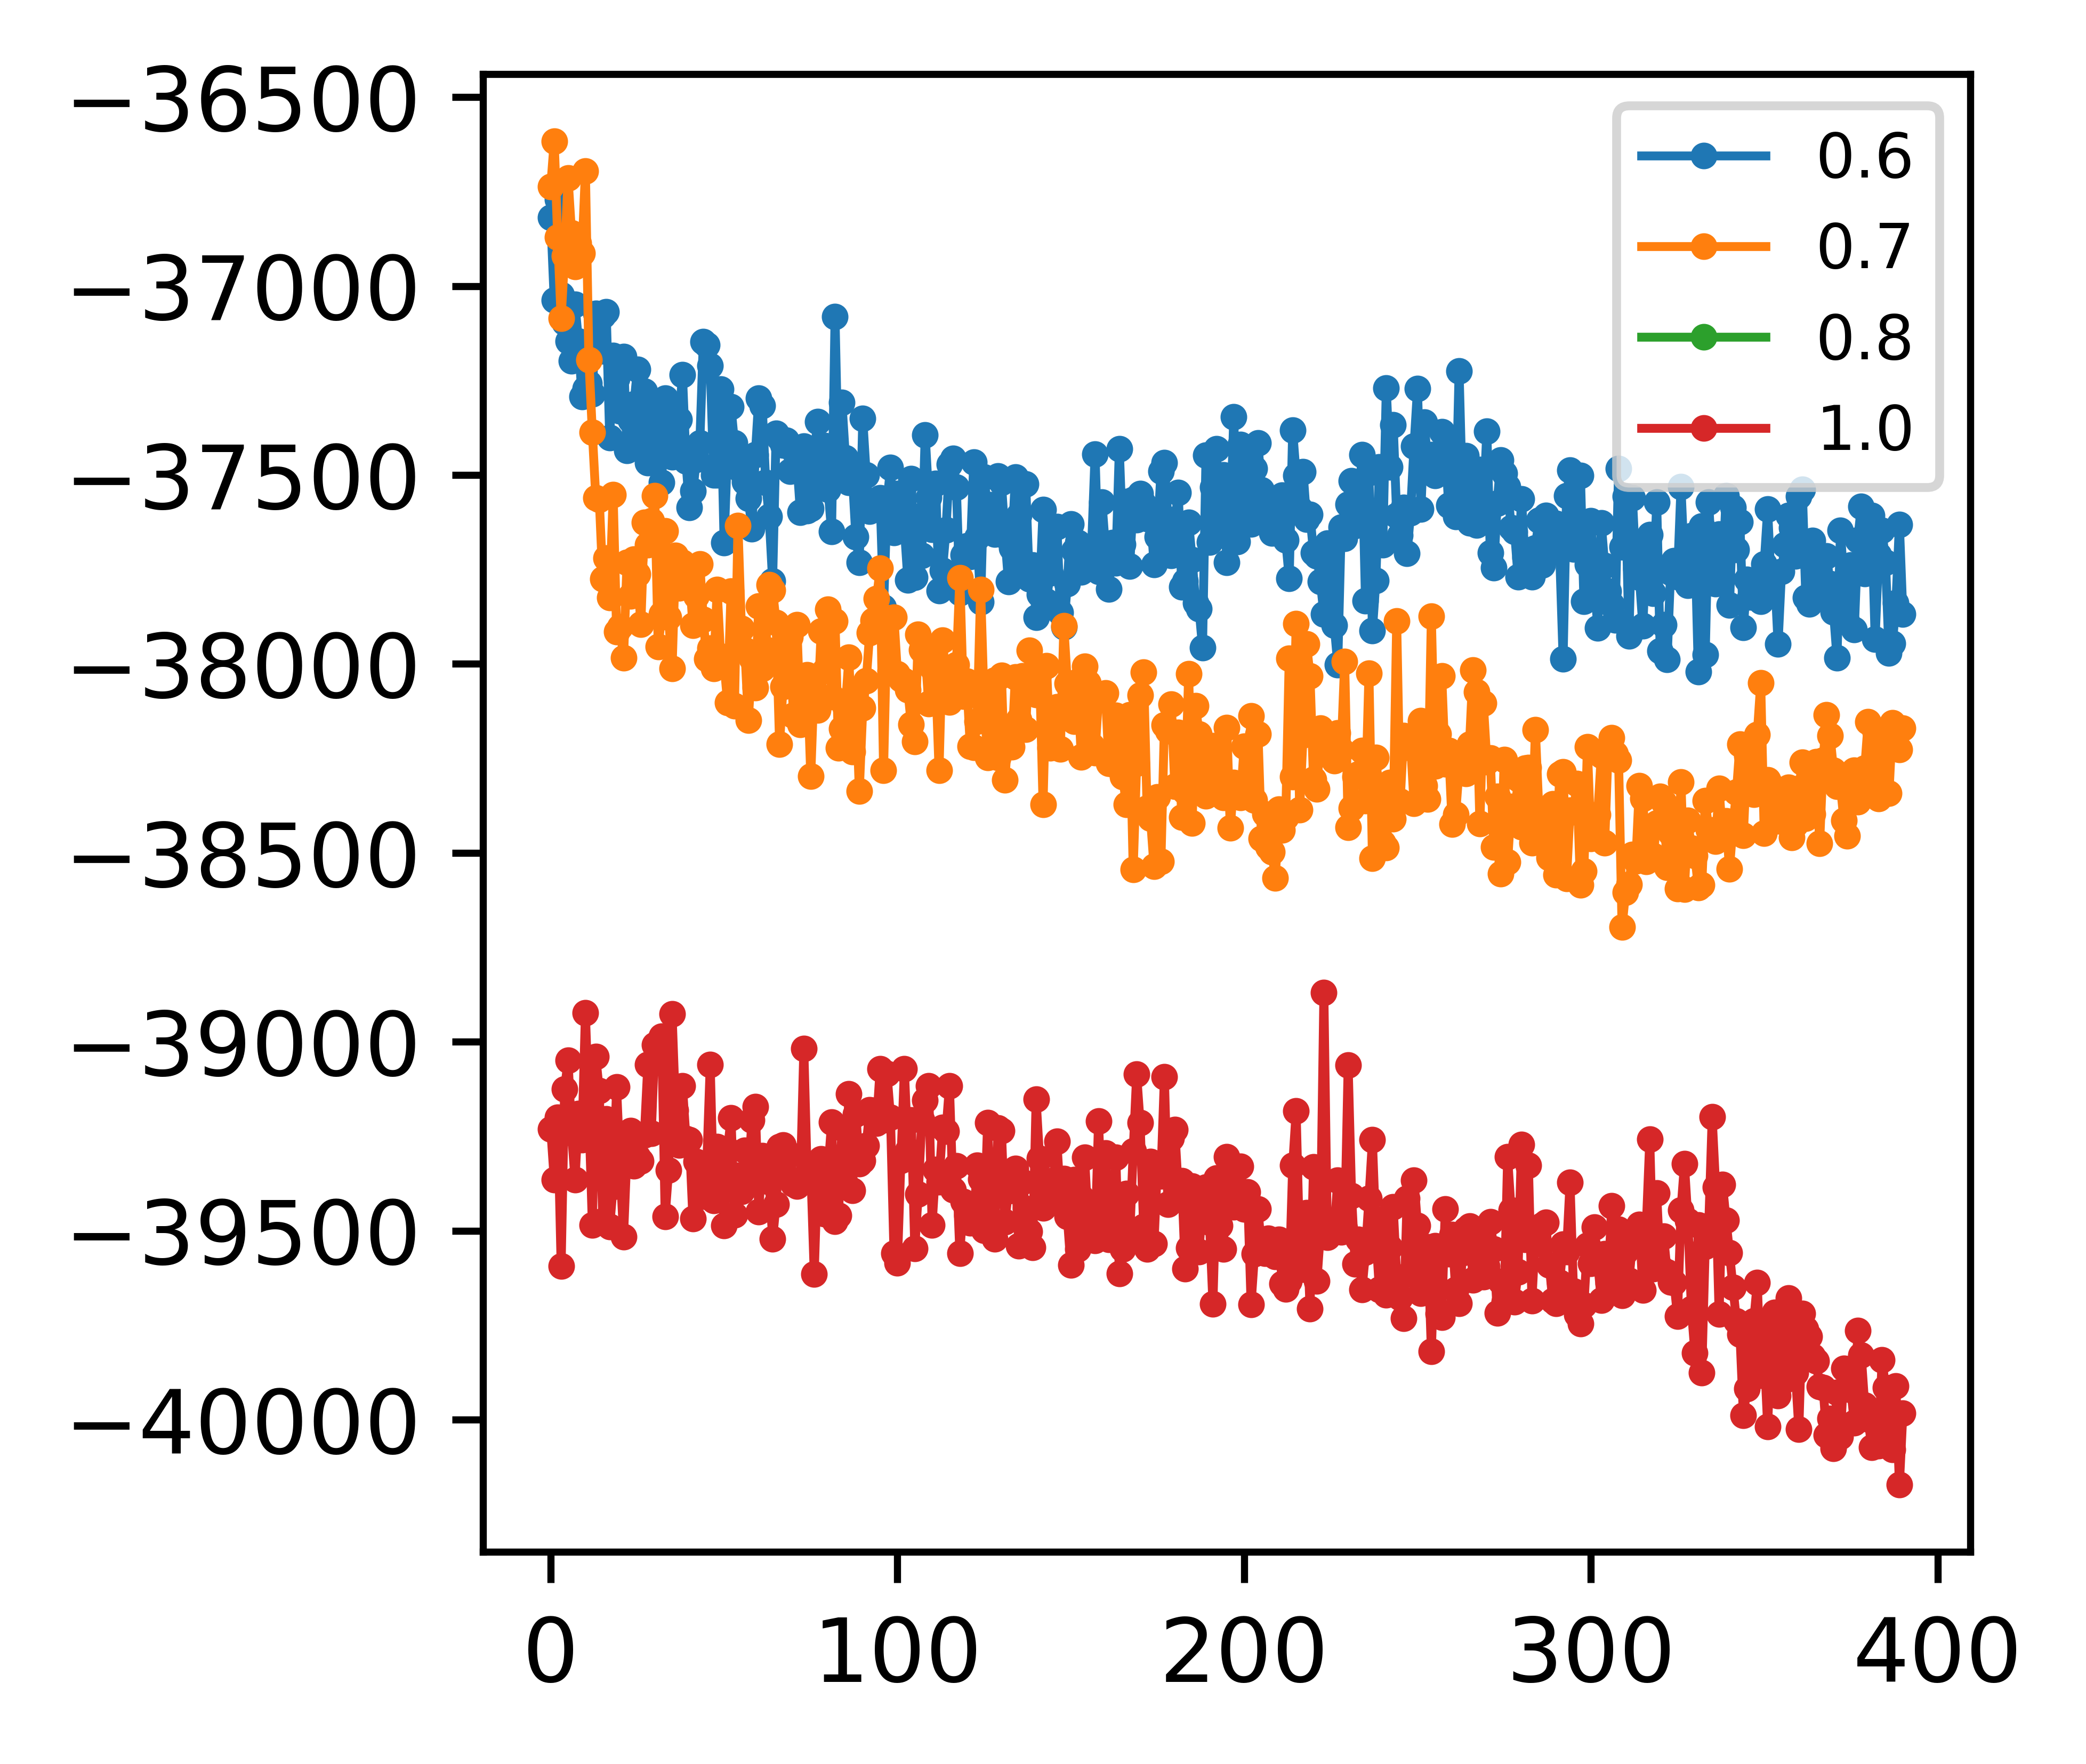

In [43]:
fig = plt.figure()

for ti_ratio, jobs in project.find_jobs({"density": 0.4}).groupby("ti_ratio"):
    for job in jobs:
        print(job)
        data = np.genfromtxt(job.fn("log1.txt"), names=True)
        pe = data["mdcomputeThermodynamicQuantitiespotential_energy"]
        plt.plot(pe[4010:], label=ti_ratio)
        
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


6f29586a5f40315093d0db865bef4fc9 0.6
6f29586a5f40315093d0db865bef4fc9
a5d9350d443d1334b167b6467fbb84ee 0.7
a5d9350d443d1334b167b6467fbb84ee
2202454aa5d0b69bd3eeb303d56db2bf 0.8
2202454aa5d0b69bd3eeb303d56db2bf
420b79ac1599ac4772100f4edf0540d5 1.0
420b79ac1599ac4772100f4edf0540d5


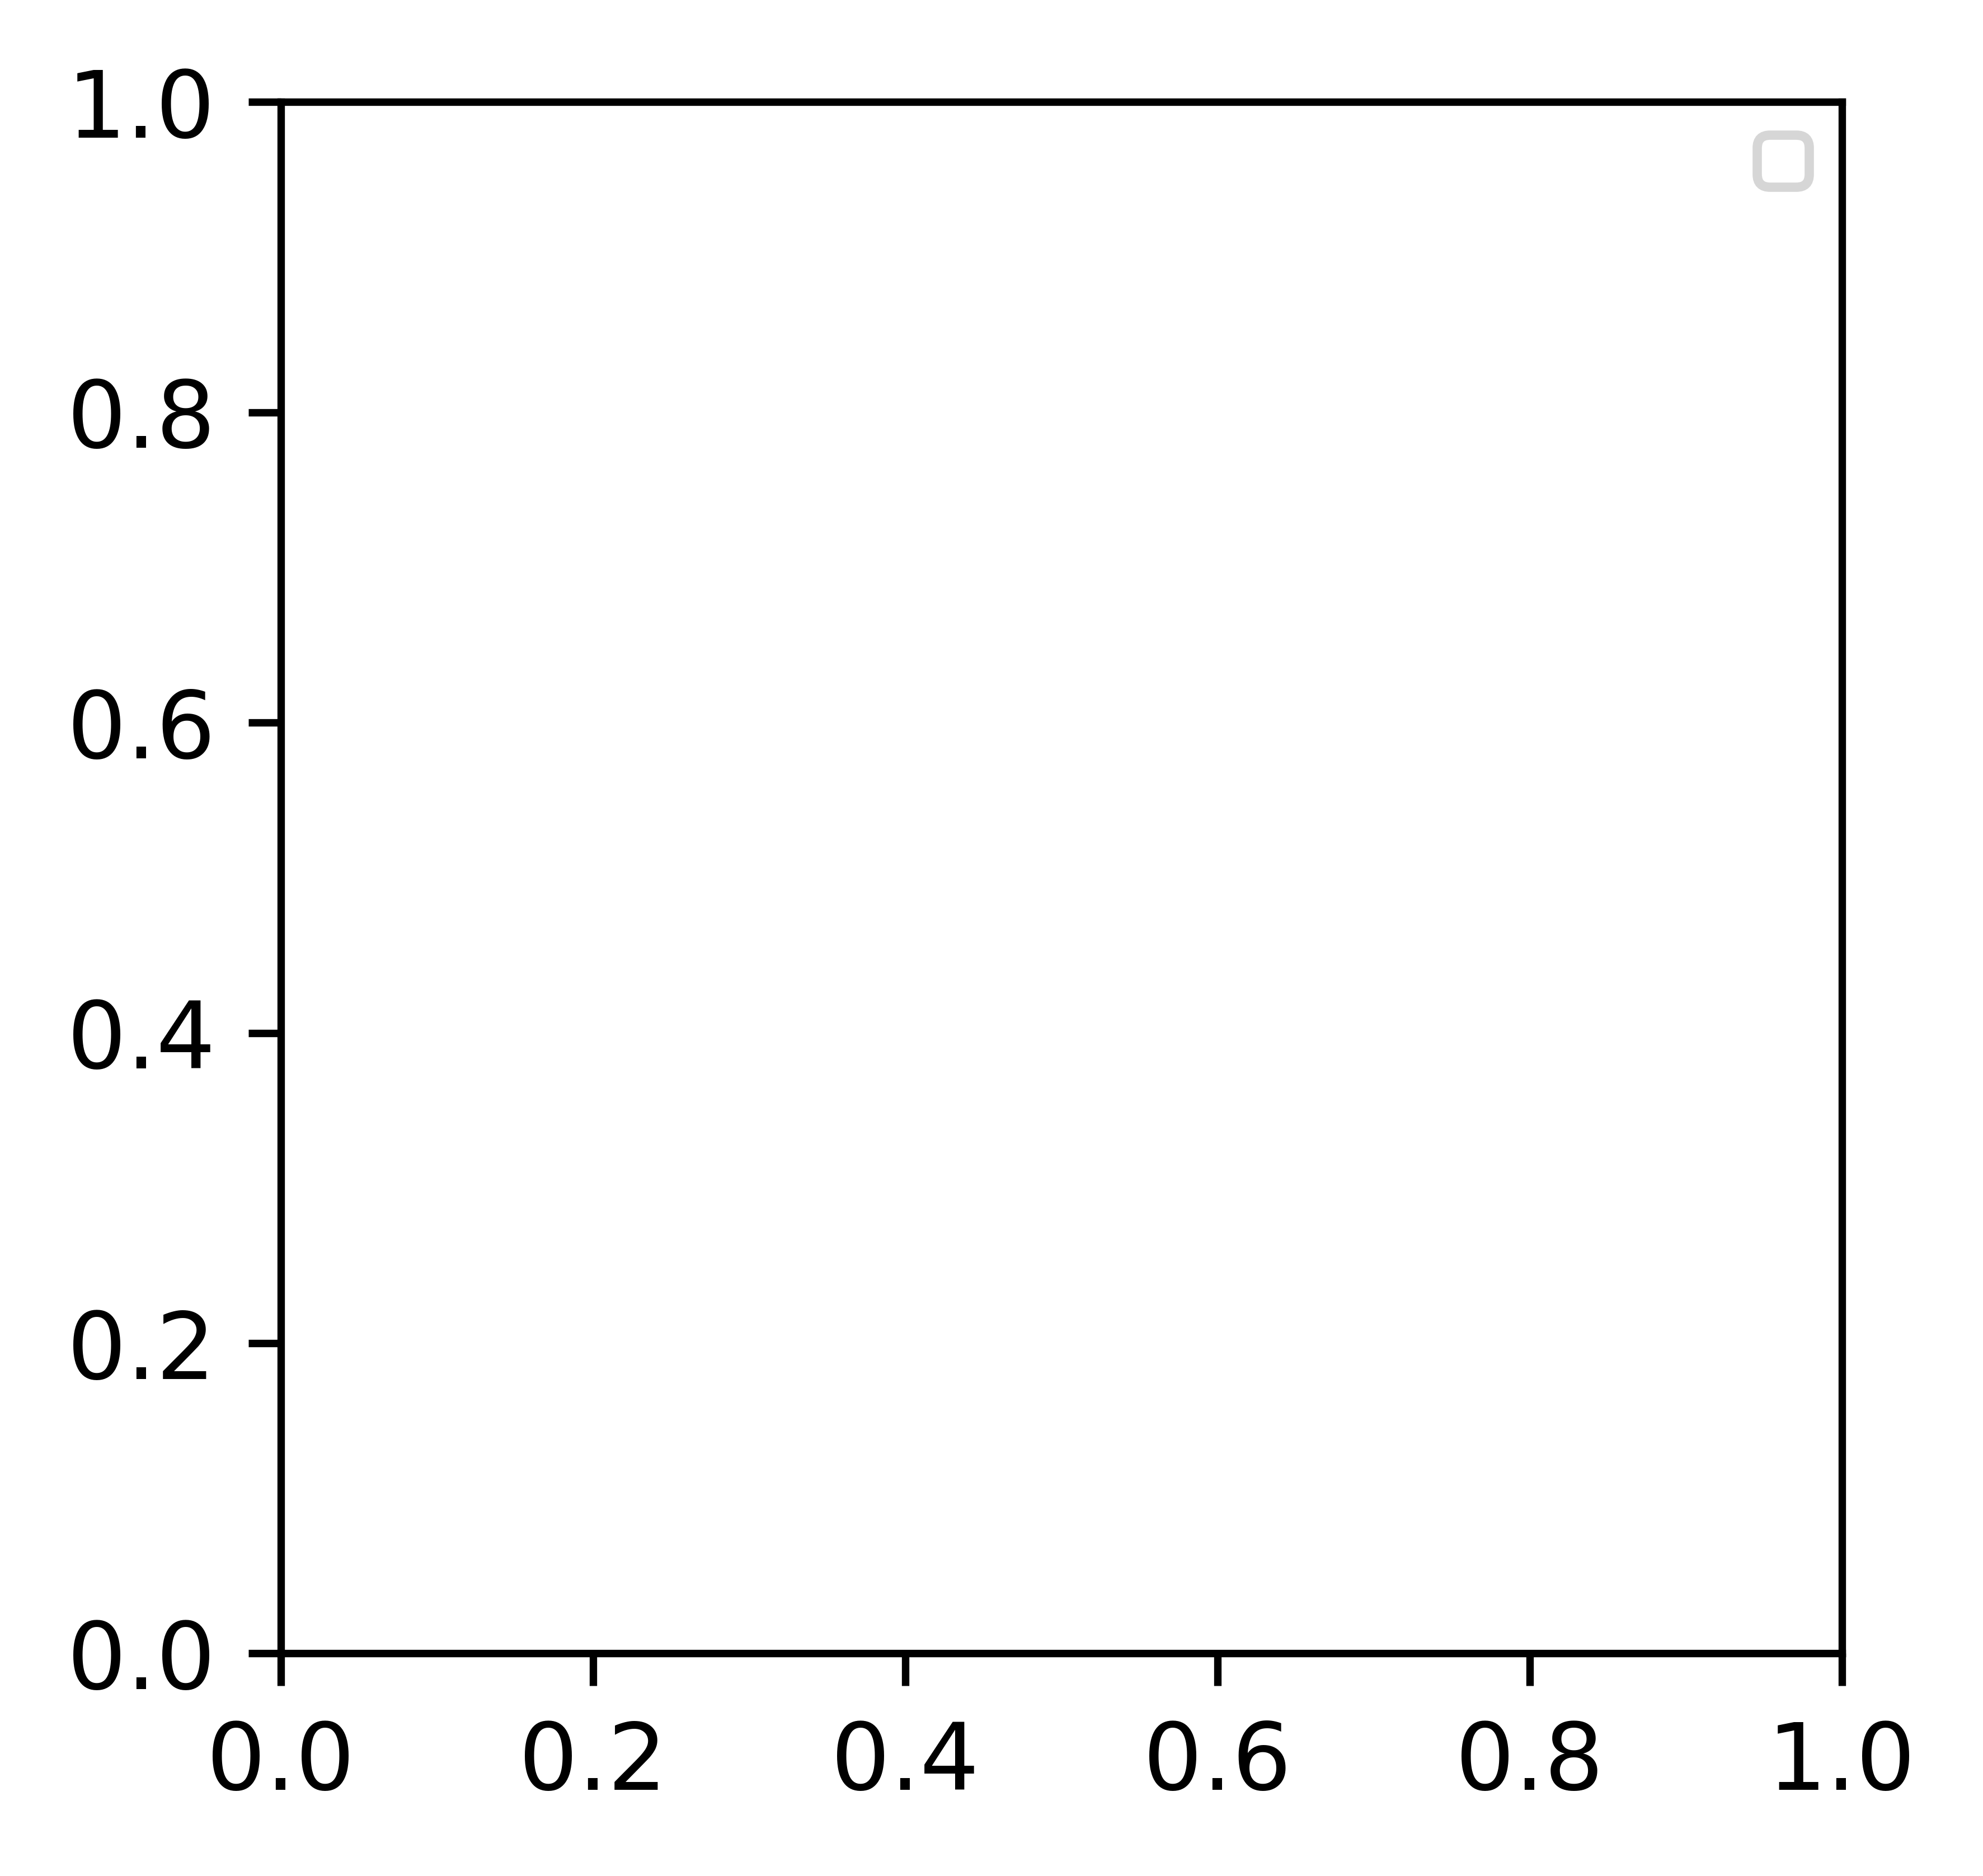

In [54]:
fig = plt.figure()

for ti_ratio, jobs in project.find_jobs({"density": 0.4}).groupby("ti_ratio"):
    for job in jobs:
        print(job, job.sp.ti_ratio)
        rdf, N = gsd_rdf(
            gsdfile=job.fn("trajectory1.gsd"),
            start=-50,
            stop=-1,
            A_name="E",
            B_name="E",
            exclude_bonded=True,
            r_max=7
        )
        
        plt.plot(rdf.bin_centers, rdf.rdf, label=ti_ratio)

#plt.plot(lattice_rdf_ee.bin_centers, lattice_rdf_ee.rdf, label="Lattice", color="k")

plt.legend()
plt.show()

In [ ]:
fig = plt.figure()

for ti_ratio, jobs in project.find_jobs({"kT_anneal": [4.0, 1.5]}).groupby("ekk_weight"):
    for job in jobs:
        rdf, N = gsd_rdf(
            gsdfile=job.fn("sim_traj.gsd"),
            start=-50,
            stop=-1,
            A_name="E",
            B_name="K",
            exclude_bonded=True,
            r_max=7
        )
        
        plt.plot(rdf.bin_centers, rdf.rdf, label=ti_ratio)
        
#plt.plot(lattice_rdf_ek.bin_centers, lattice_rdf_ek.rdf, label="Lattice", color="k")
        
plt.legend()
plt.show()

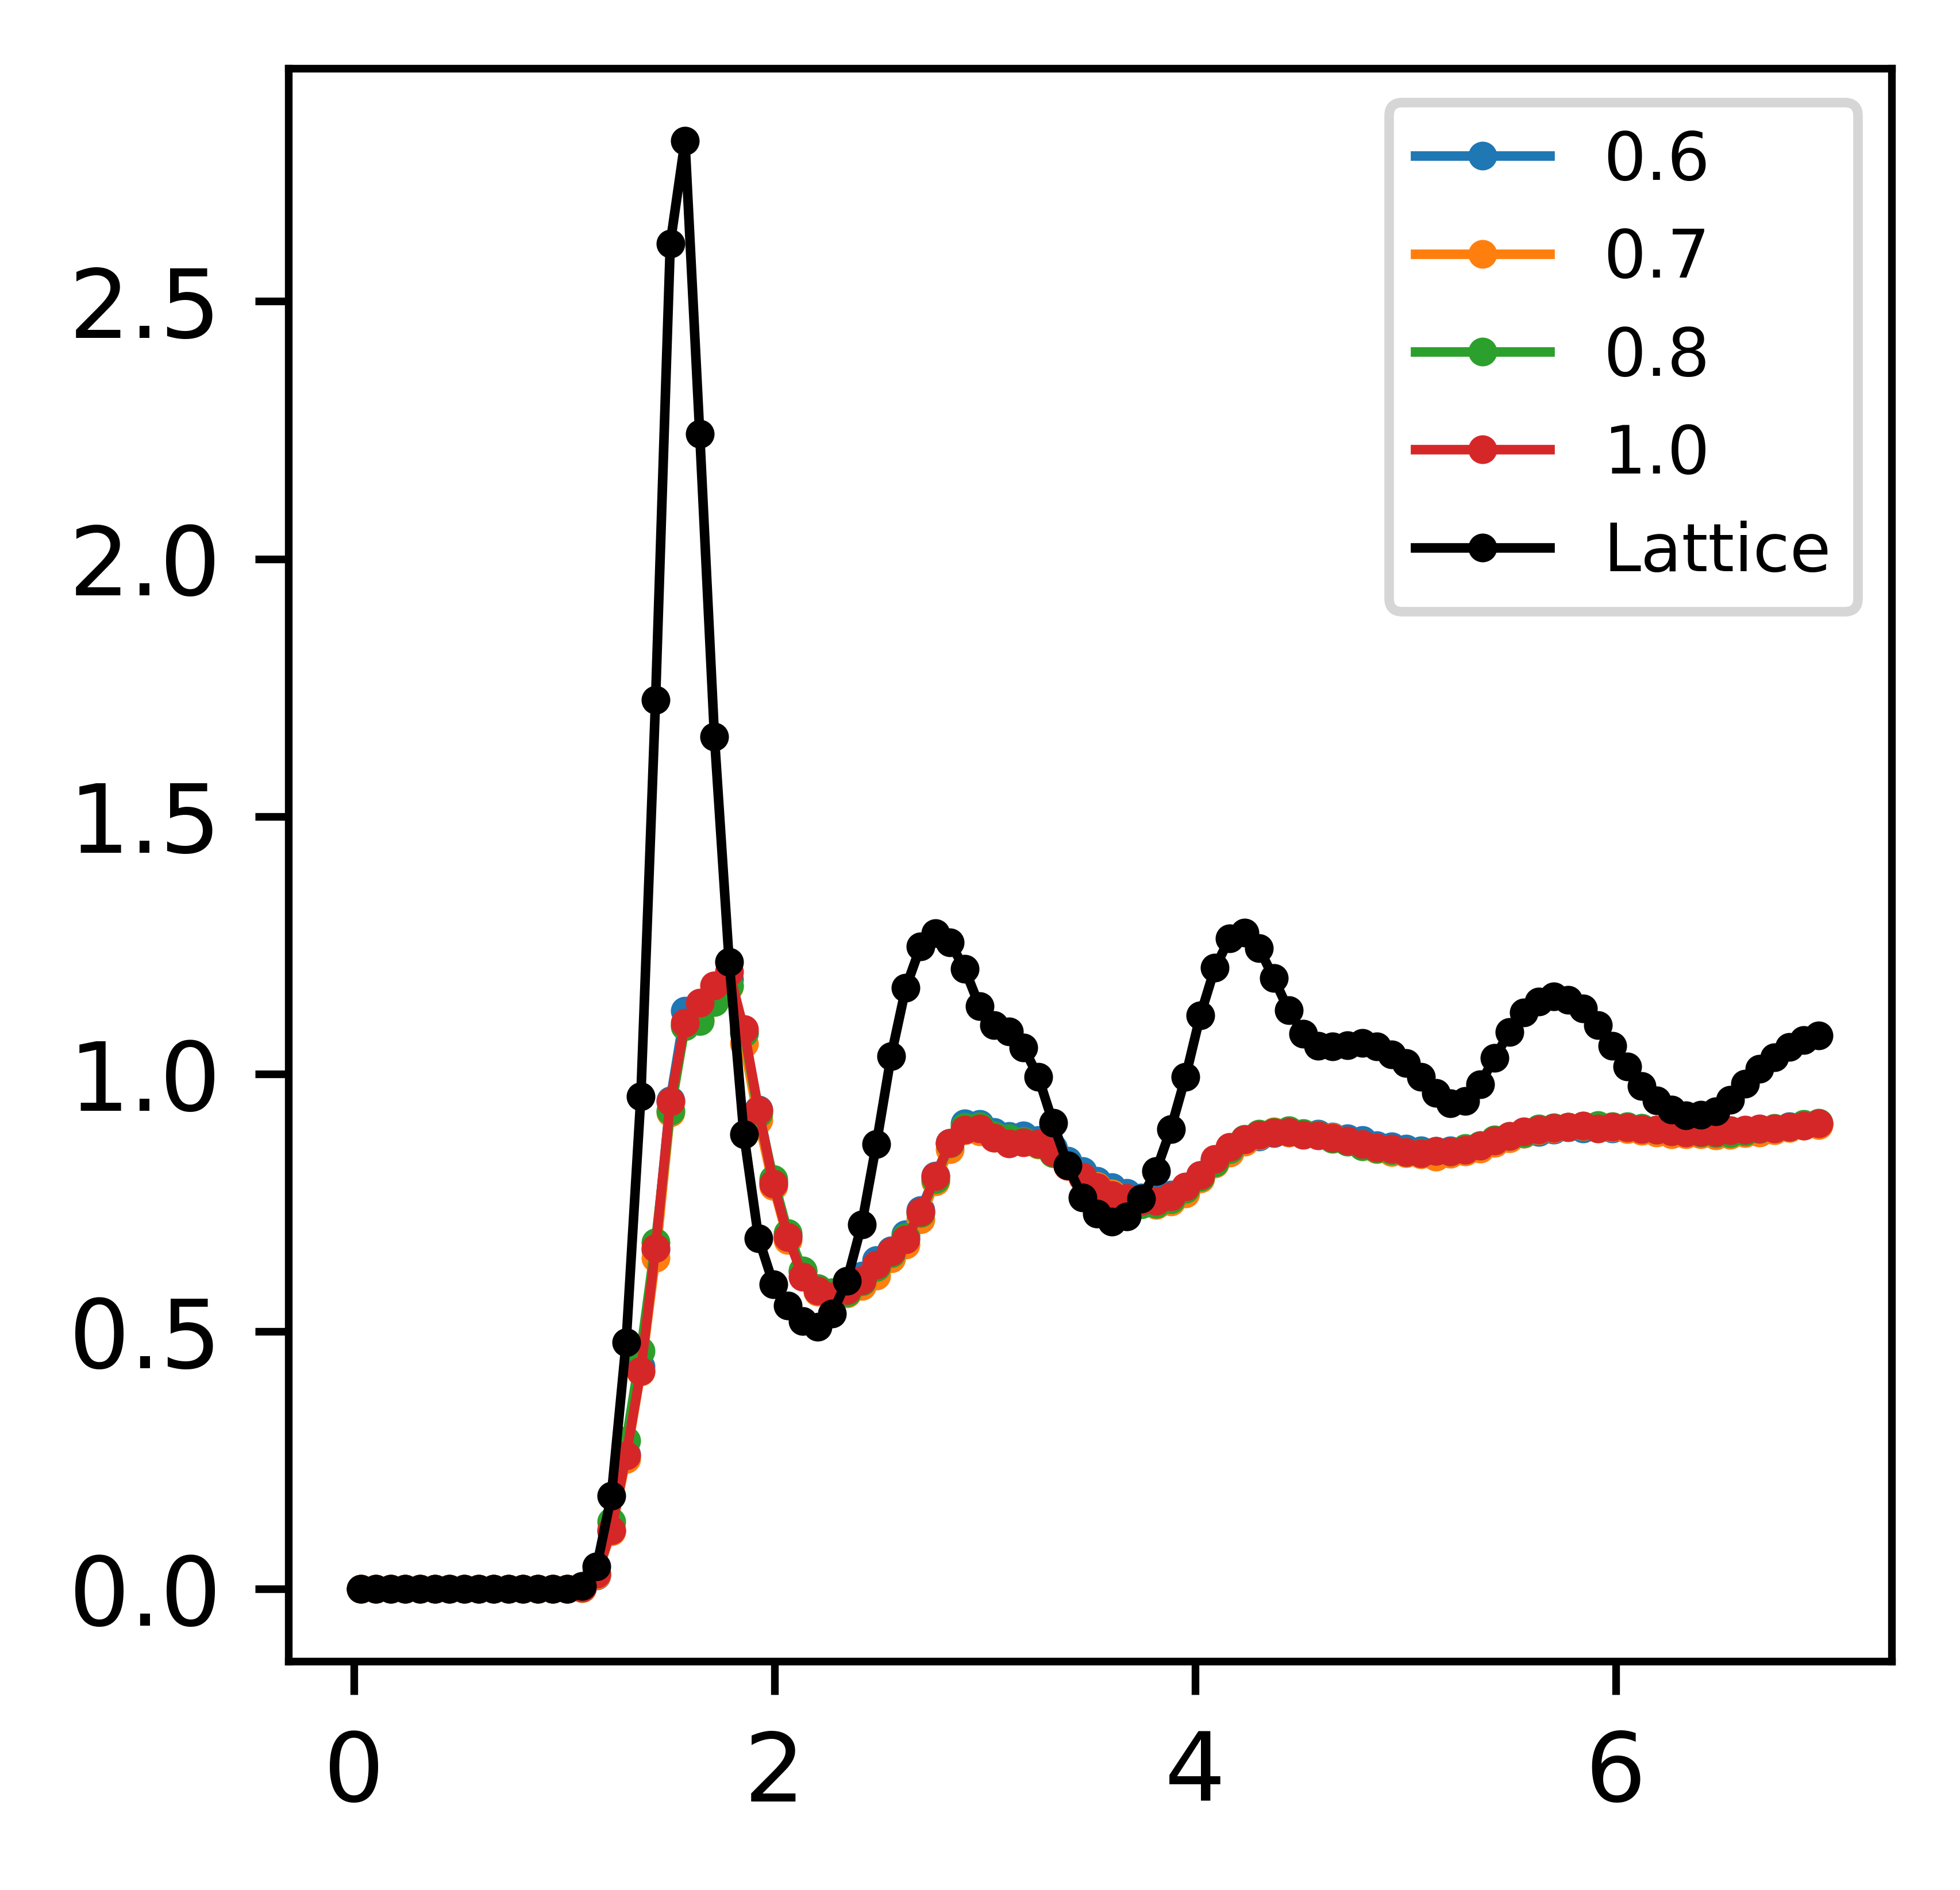

In [112]:
fig = plt.figure()

for ti_ratio, jobs in project.find_jobs({"kT_anneal": [4.0, 1.5]}).groupby("ekk_weight"):
    for job in jobs:
        rdf, N = gsd_rdf(
            gsdfile=job.fn("sim_traj.gsd"),
            start=-50,
            stop=-1,
            A_name="K",
            B_name="K",
            exclude_bonded=True,
            r_max=7
        )
        
        plt.plot(rdf.bin_centers, rdf.rdf * N, label=ti_ratio)
        
plt.plot(lattice_rdf_kk.bin_centers, lattice_rdf_kk.rdf * lattice_N_kk, label="Lattice", color="k")

plt.legend()
plt.show()

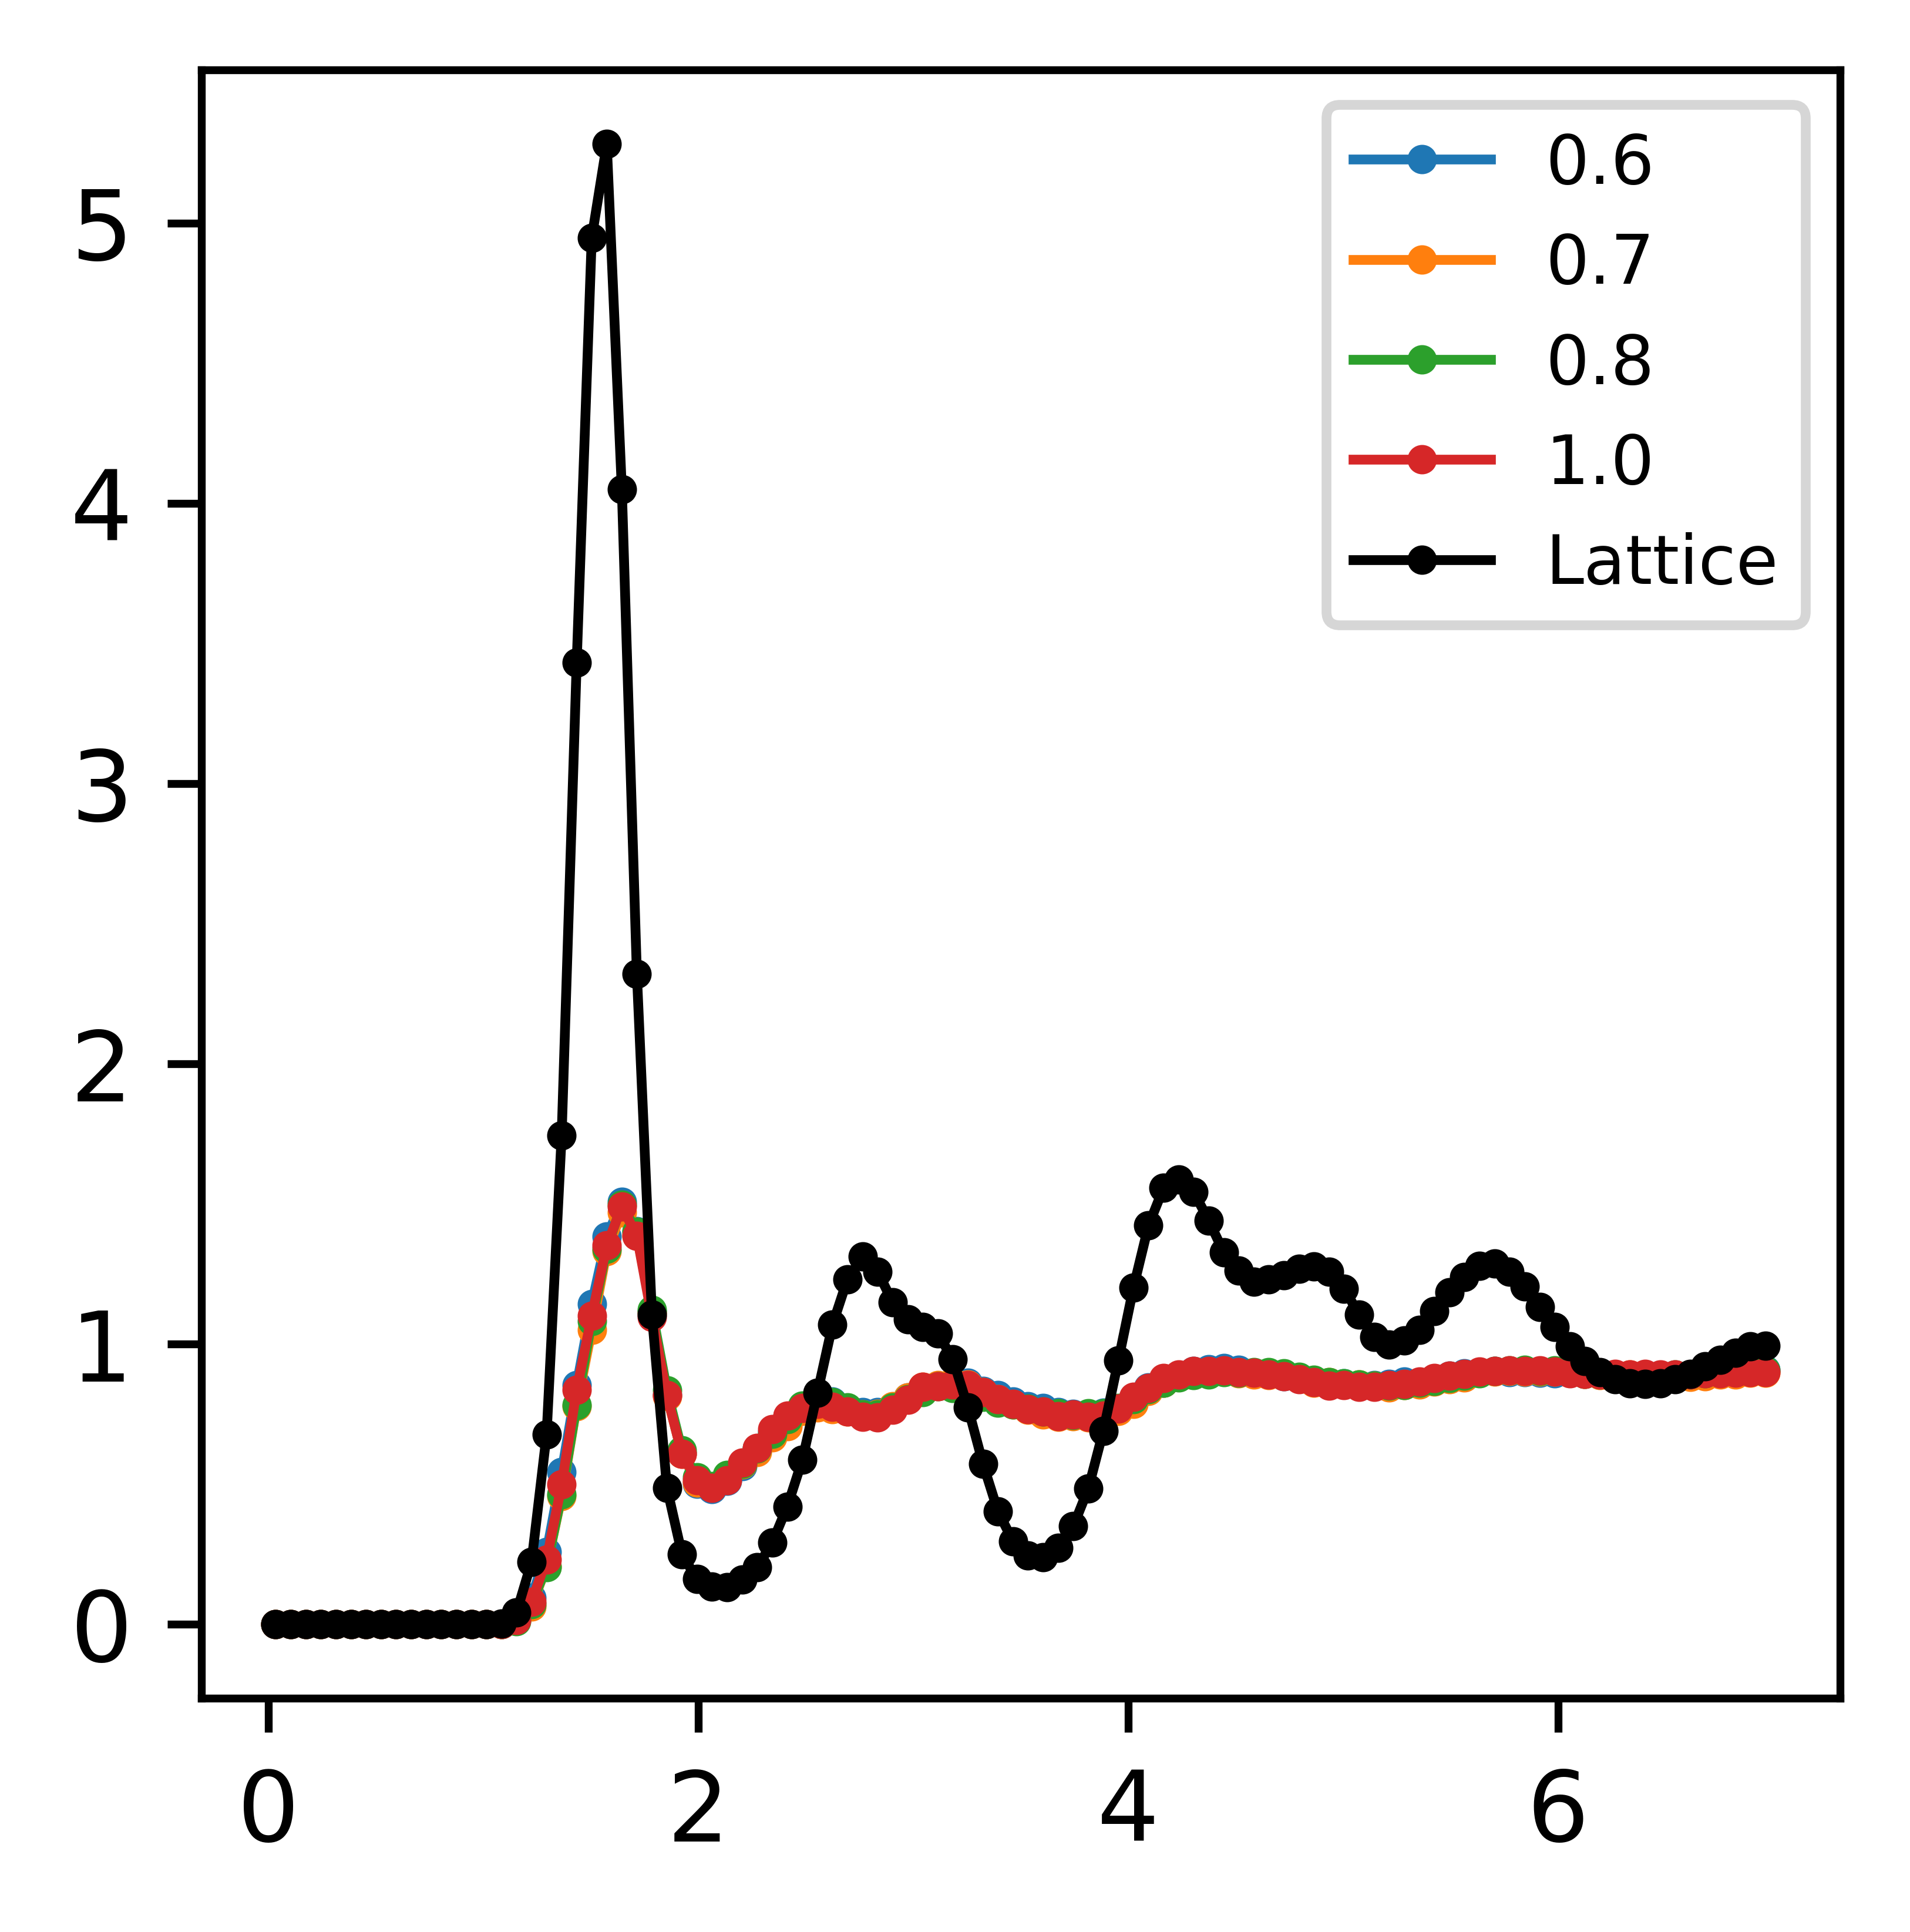

In [113]:
fig = plt.figure()

for ti_ratio, jobs in project.find_jobs({"kT_anneal": [4.0, 1.5]}).groupby("ekk_weight"):
    for job in jobs:
        job.doc.gsd_anneal_start = 40
        job.doc.gsd_anneal_end = 2040
        rdf, N = gsd_rdf(
            gsdfile=job.fn("sim_traj.gsd"),
            start=-50,
            stop=-1,
            A_name="E",
            B_name="E",
            exclude_bonded=True,
            r_max=7
        )
        
        plt.plot(rdf.bin_centers, rdf.rdf * N, label=ti_ratio)
        
plt.plot(lattice_rdf_ee.bin_centers, lattice_rdf_ee.rdf * lattice_N_ee, label="Lattice", color="k")
  
plt.legend()
plt.show()

In [42]:
fig = plt.figure()

for ti_ratio, jobs in project.find_jobs({"kT_anneal": [4.0, 1.5]}).groupby("ekk_weight"):
    for job in jobs:
        print(ti_ratio, job.ws)

0.6 /home/erjank_project/chrisjones/pekk-msibi-final/coarse-grain-sims/bulk-annealing/ti_ratio_relaxation/polybinder-flow/workspace/ab6fdc6a5e6cb46c559b6f9f84a9dd82
0.7 /home/erjank_project/chrisjones/pekk-msibi-final/coarse-grain-sims/bulk-annealing/ti_ratio_relaxation/polybinder-flow/workspace/a8649401fa943232bc127376c5a44beb
0.8 /home/erjank_project/chrisjones/pekk-msibi-final/coarse-grain-sims/bulk-annealing/ti_ratio_relaxation/polybinder-flow/workspace/6956ce9cfb38aced7cf1322c91c95e21
1.0 /home/erjank_project/chrisjones/pekk-msibi-final/coarse-grain-sims/bulk-annealing/ti_ratio_relaxation/polybinder-flow/workspace/f561964adc7ab9b9a96edb06b7e66a41


<Figure size 3600x3600 with 0 Axes>

In [24]:
with gsd.hoomd.open(job.fn("sim_traj.gsd")) as traj:
    print(len(traj))

2140


# Temp windows:

shrink: 0 - 

In [65]:
gsd_windows = np.arange(241, 2001 + 41, 200)

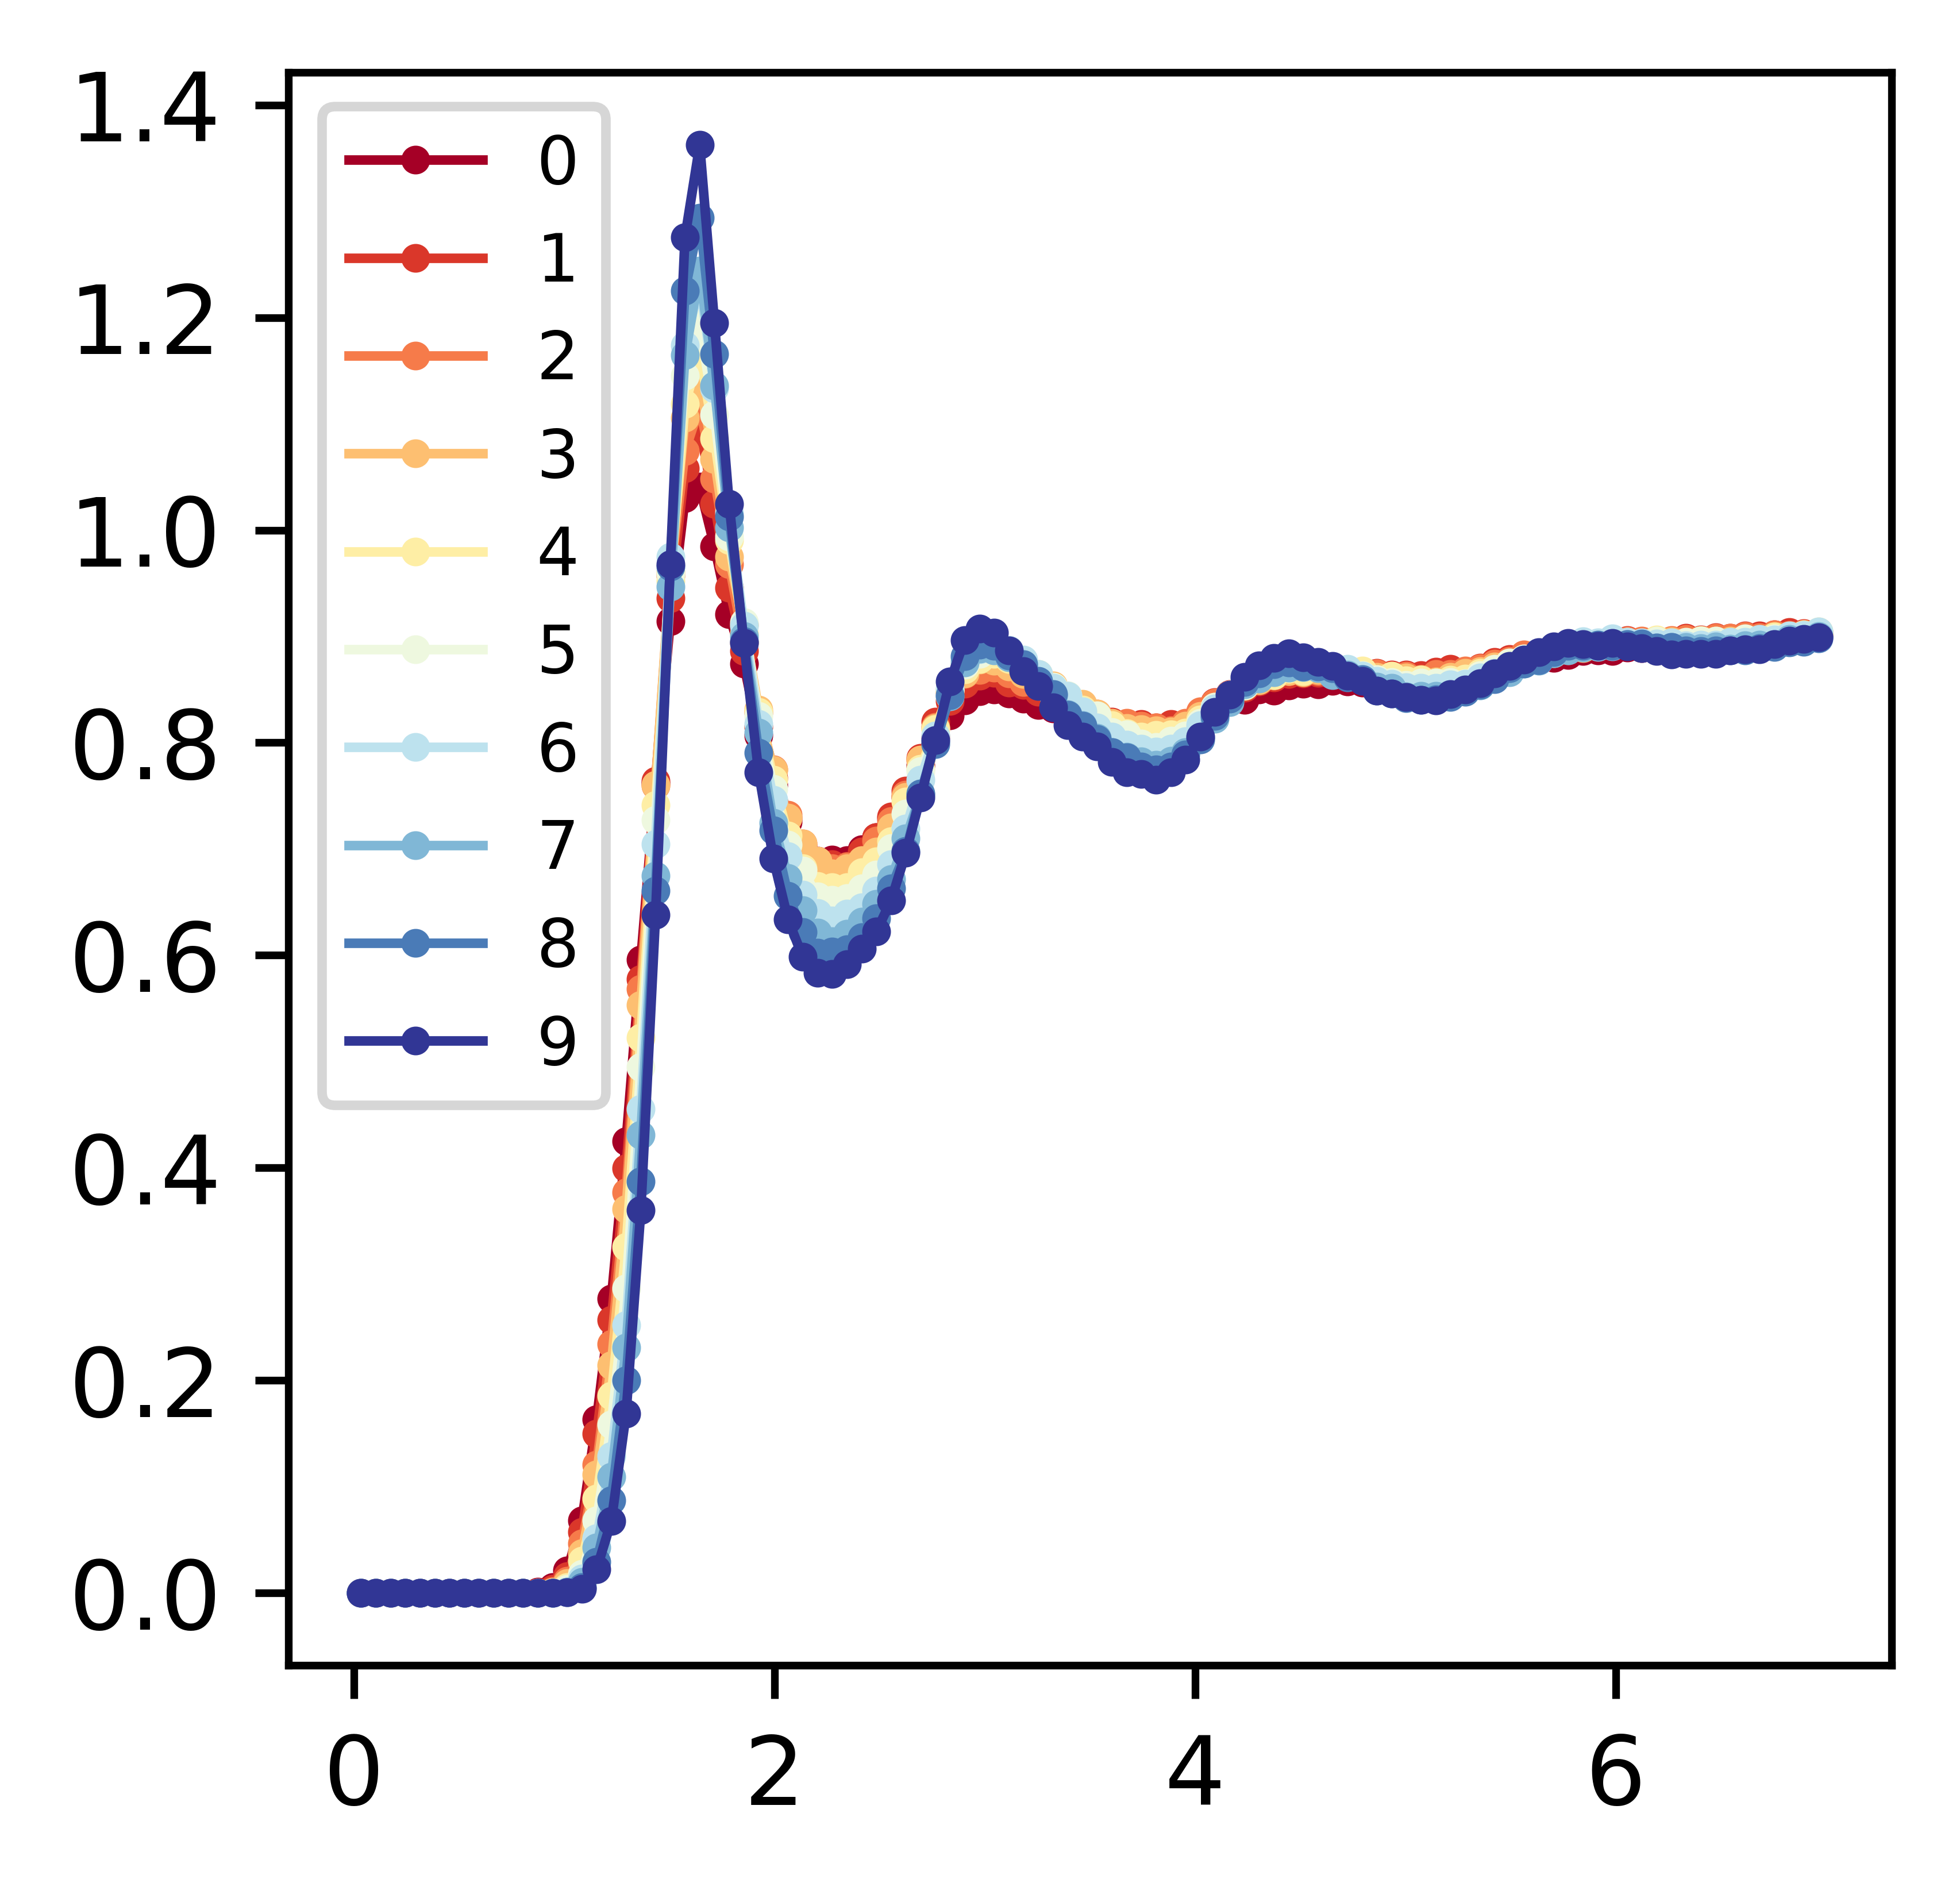

In [101]:
fig = plt.figure()
gradient_colors = hot_to_cold_gradient(n=10)
gradient_colors = gradient_colors[::-1]

for ti_ratio, jobs in project.find_jobs({"kT_anneal": [4.0, 1.5], "ekk_weight": 1.0}).groupby("ekk_weight"):
    for job in jobs:
        for i, window in enumerate(gsd_windows):
            start = window - 50
            stop = window - 1
    
            rdf, N = gsd_rdf(
                gsdfile=job.fn("sim_traj.gsd"),
                start=start,
                stop=stop,
                A_name="E",
                B_name="K",
                exclude_bonded=True,
                r_max=7,
            )
            plt.plot(
                rdf.bin_centers,
                rdf.rdf * N,
                #(rdf.rdf * N) + (i*0.2) ,
                label=i,
                color=gradient_colors[i]
            )

plt.legend()
plt.show()

In [66]:
len(gsd_windows)

10

In [67]:
gsd_windows

array([ 241,  441,  641,  841, 1041, 1241, 1441, 1641, 1841, 2041])

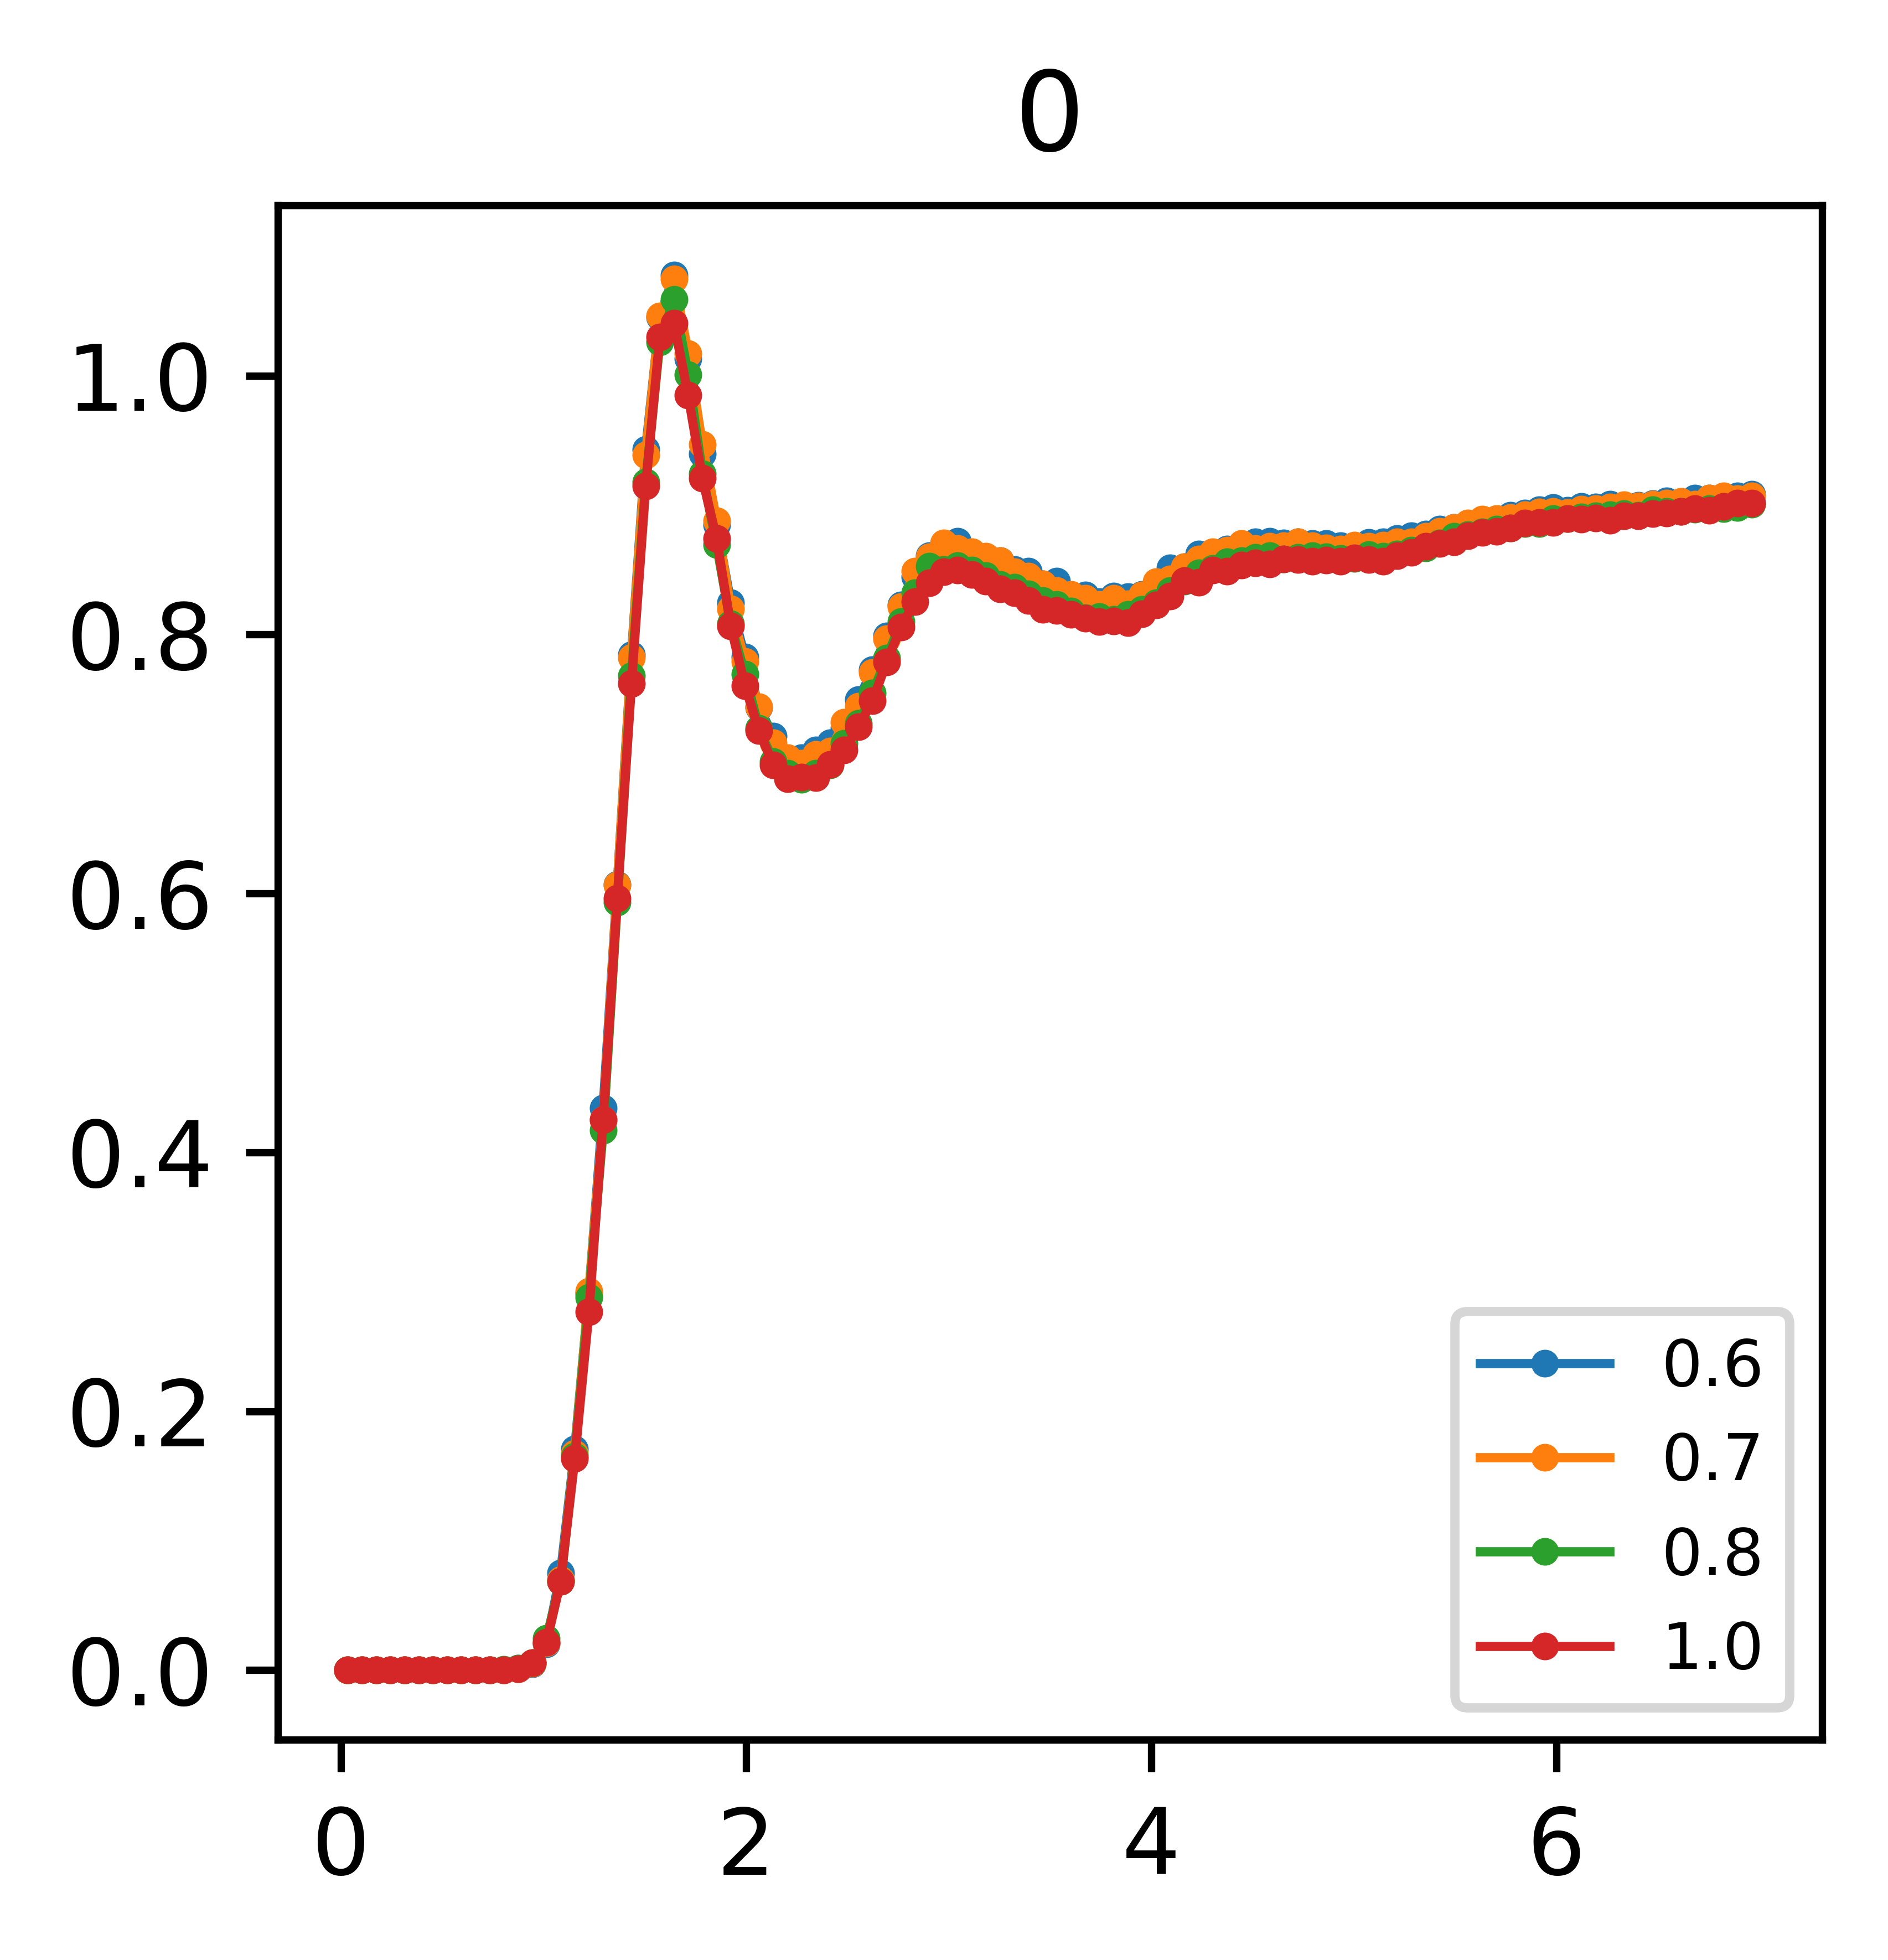

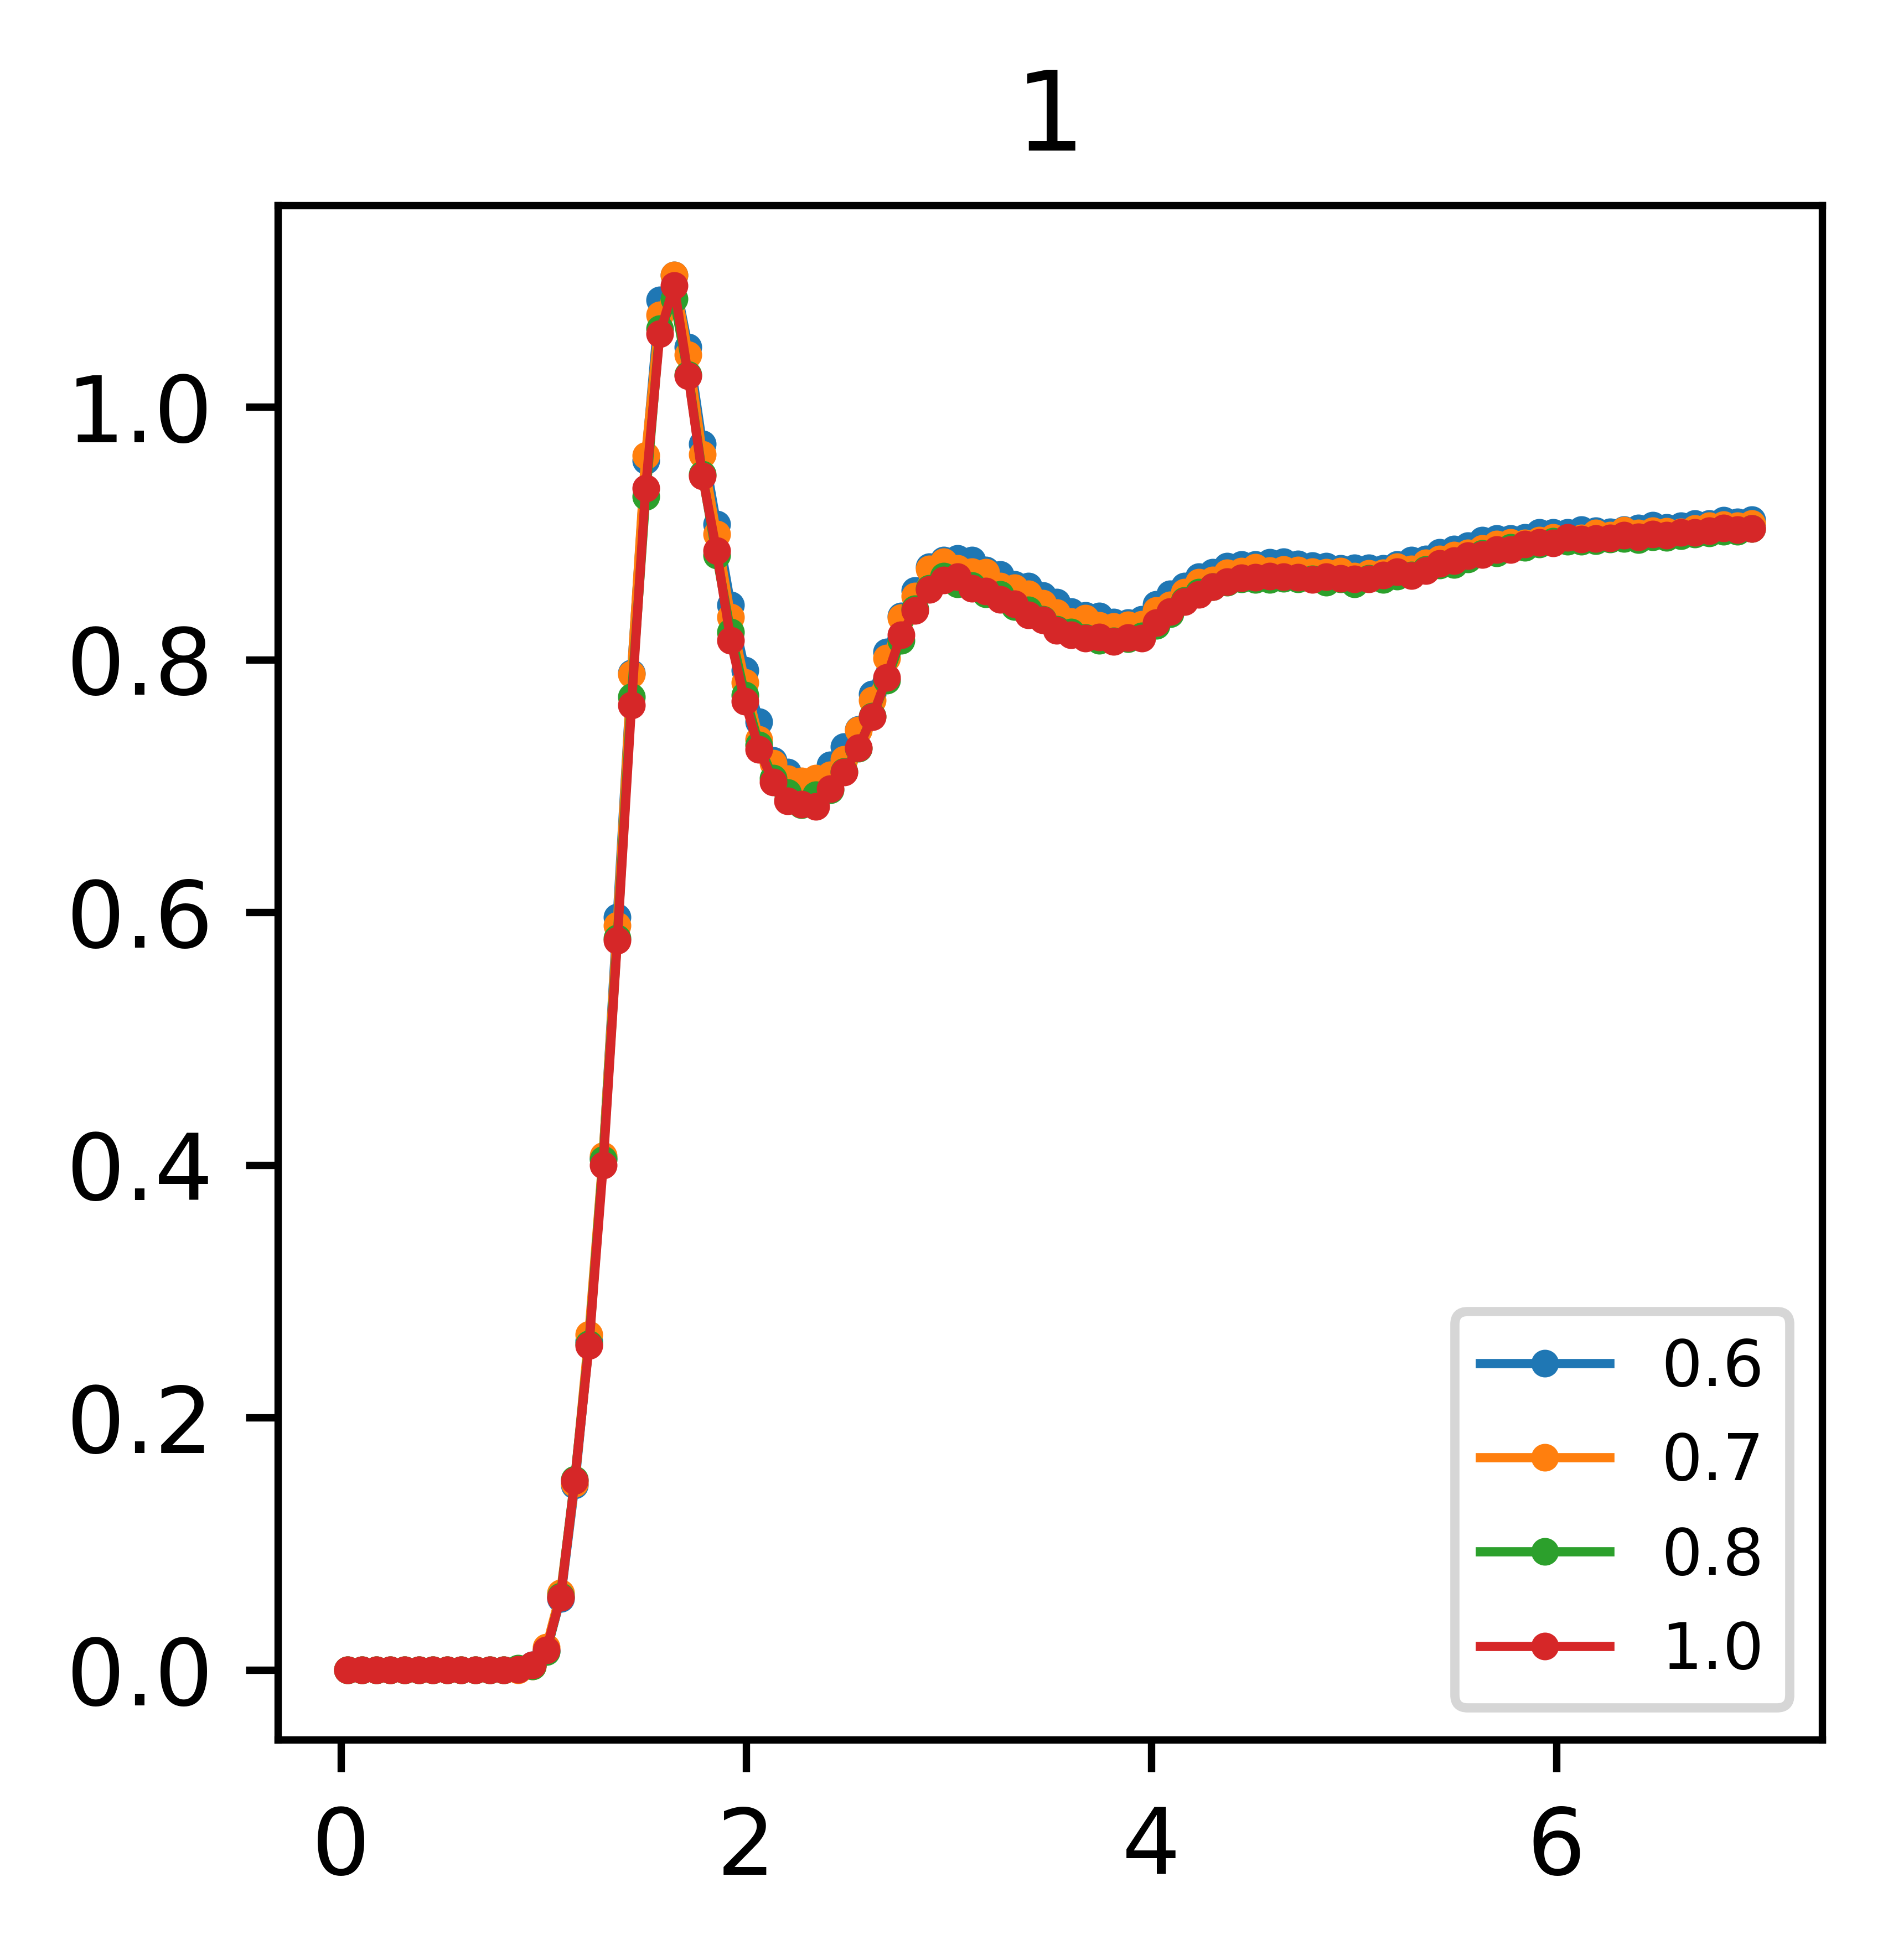

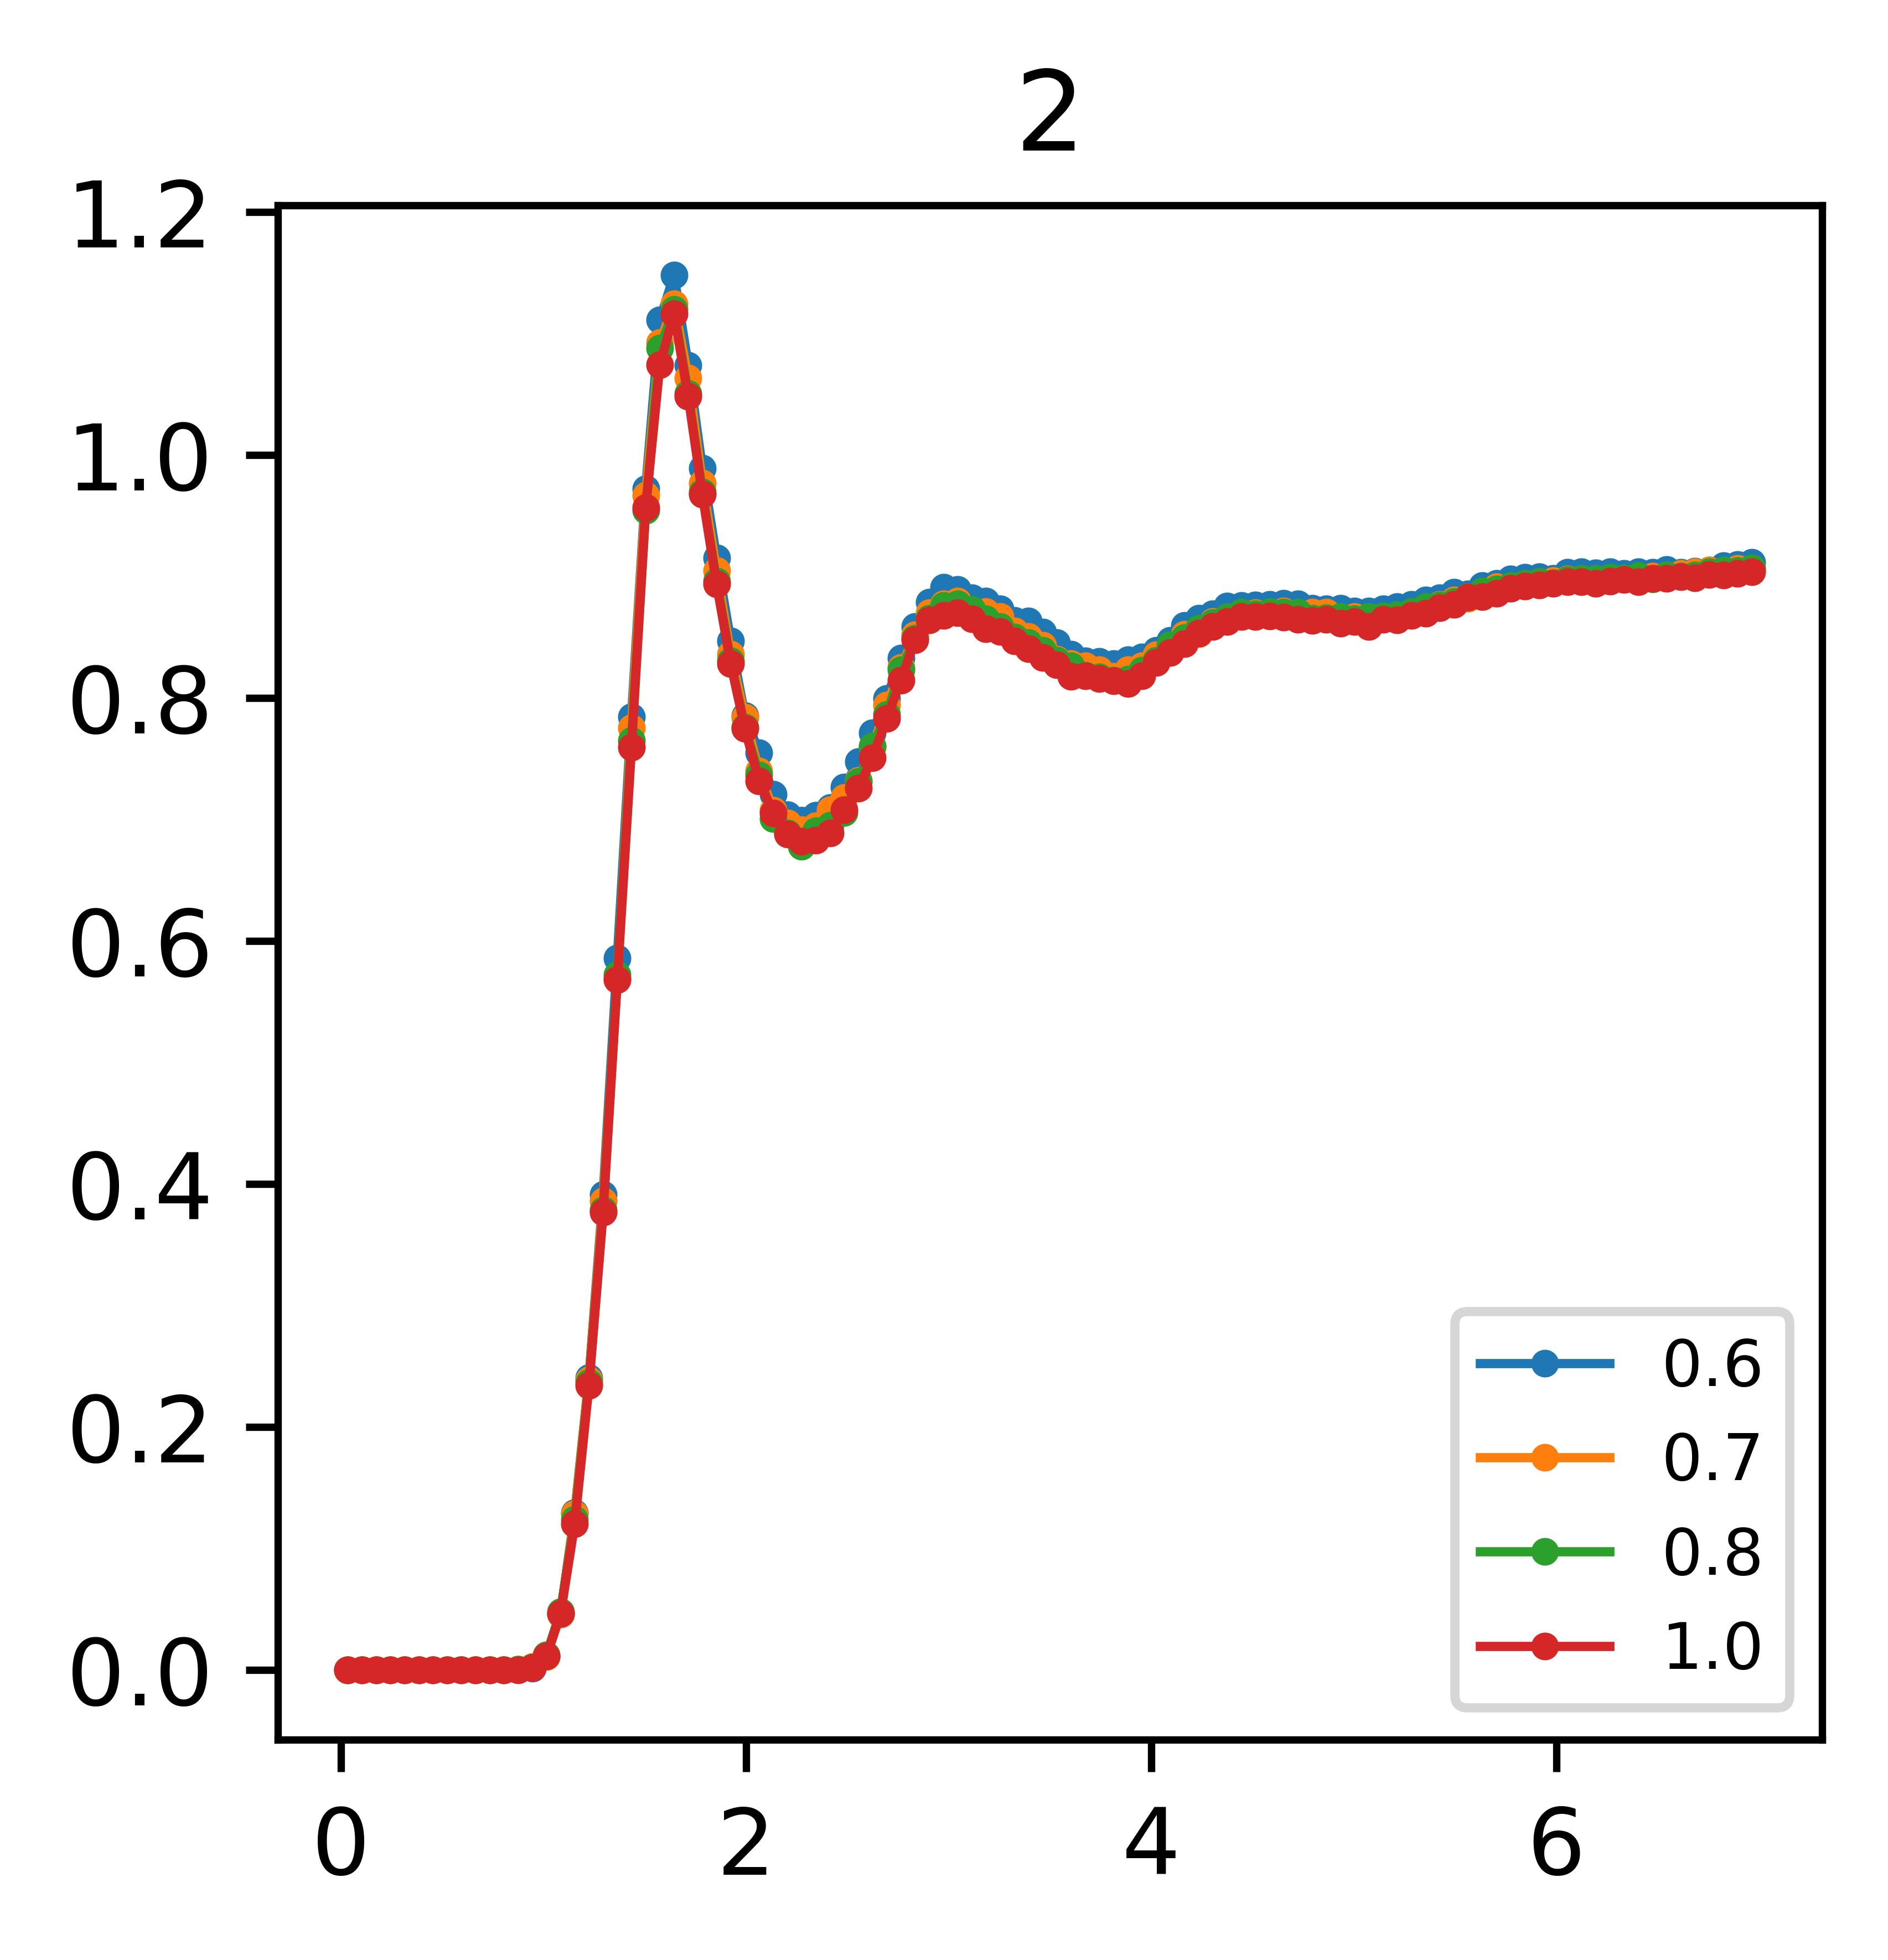

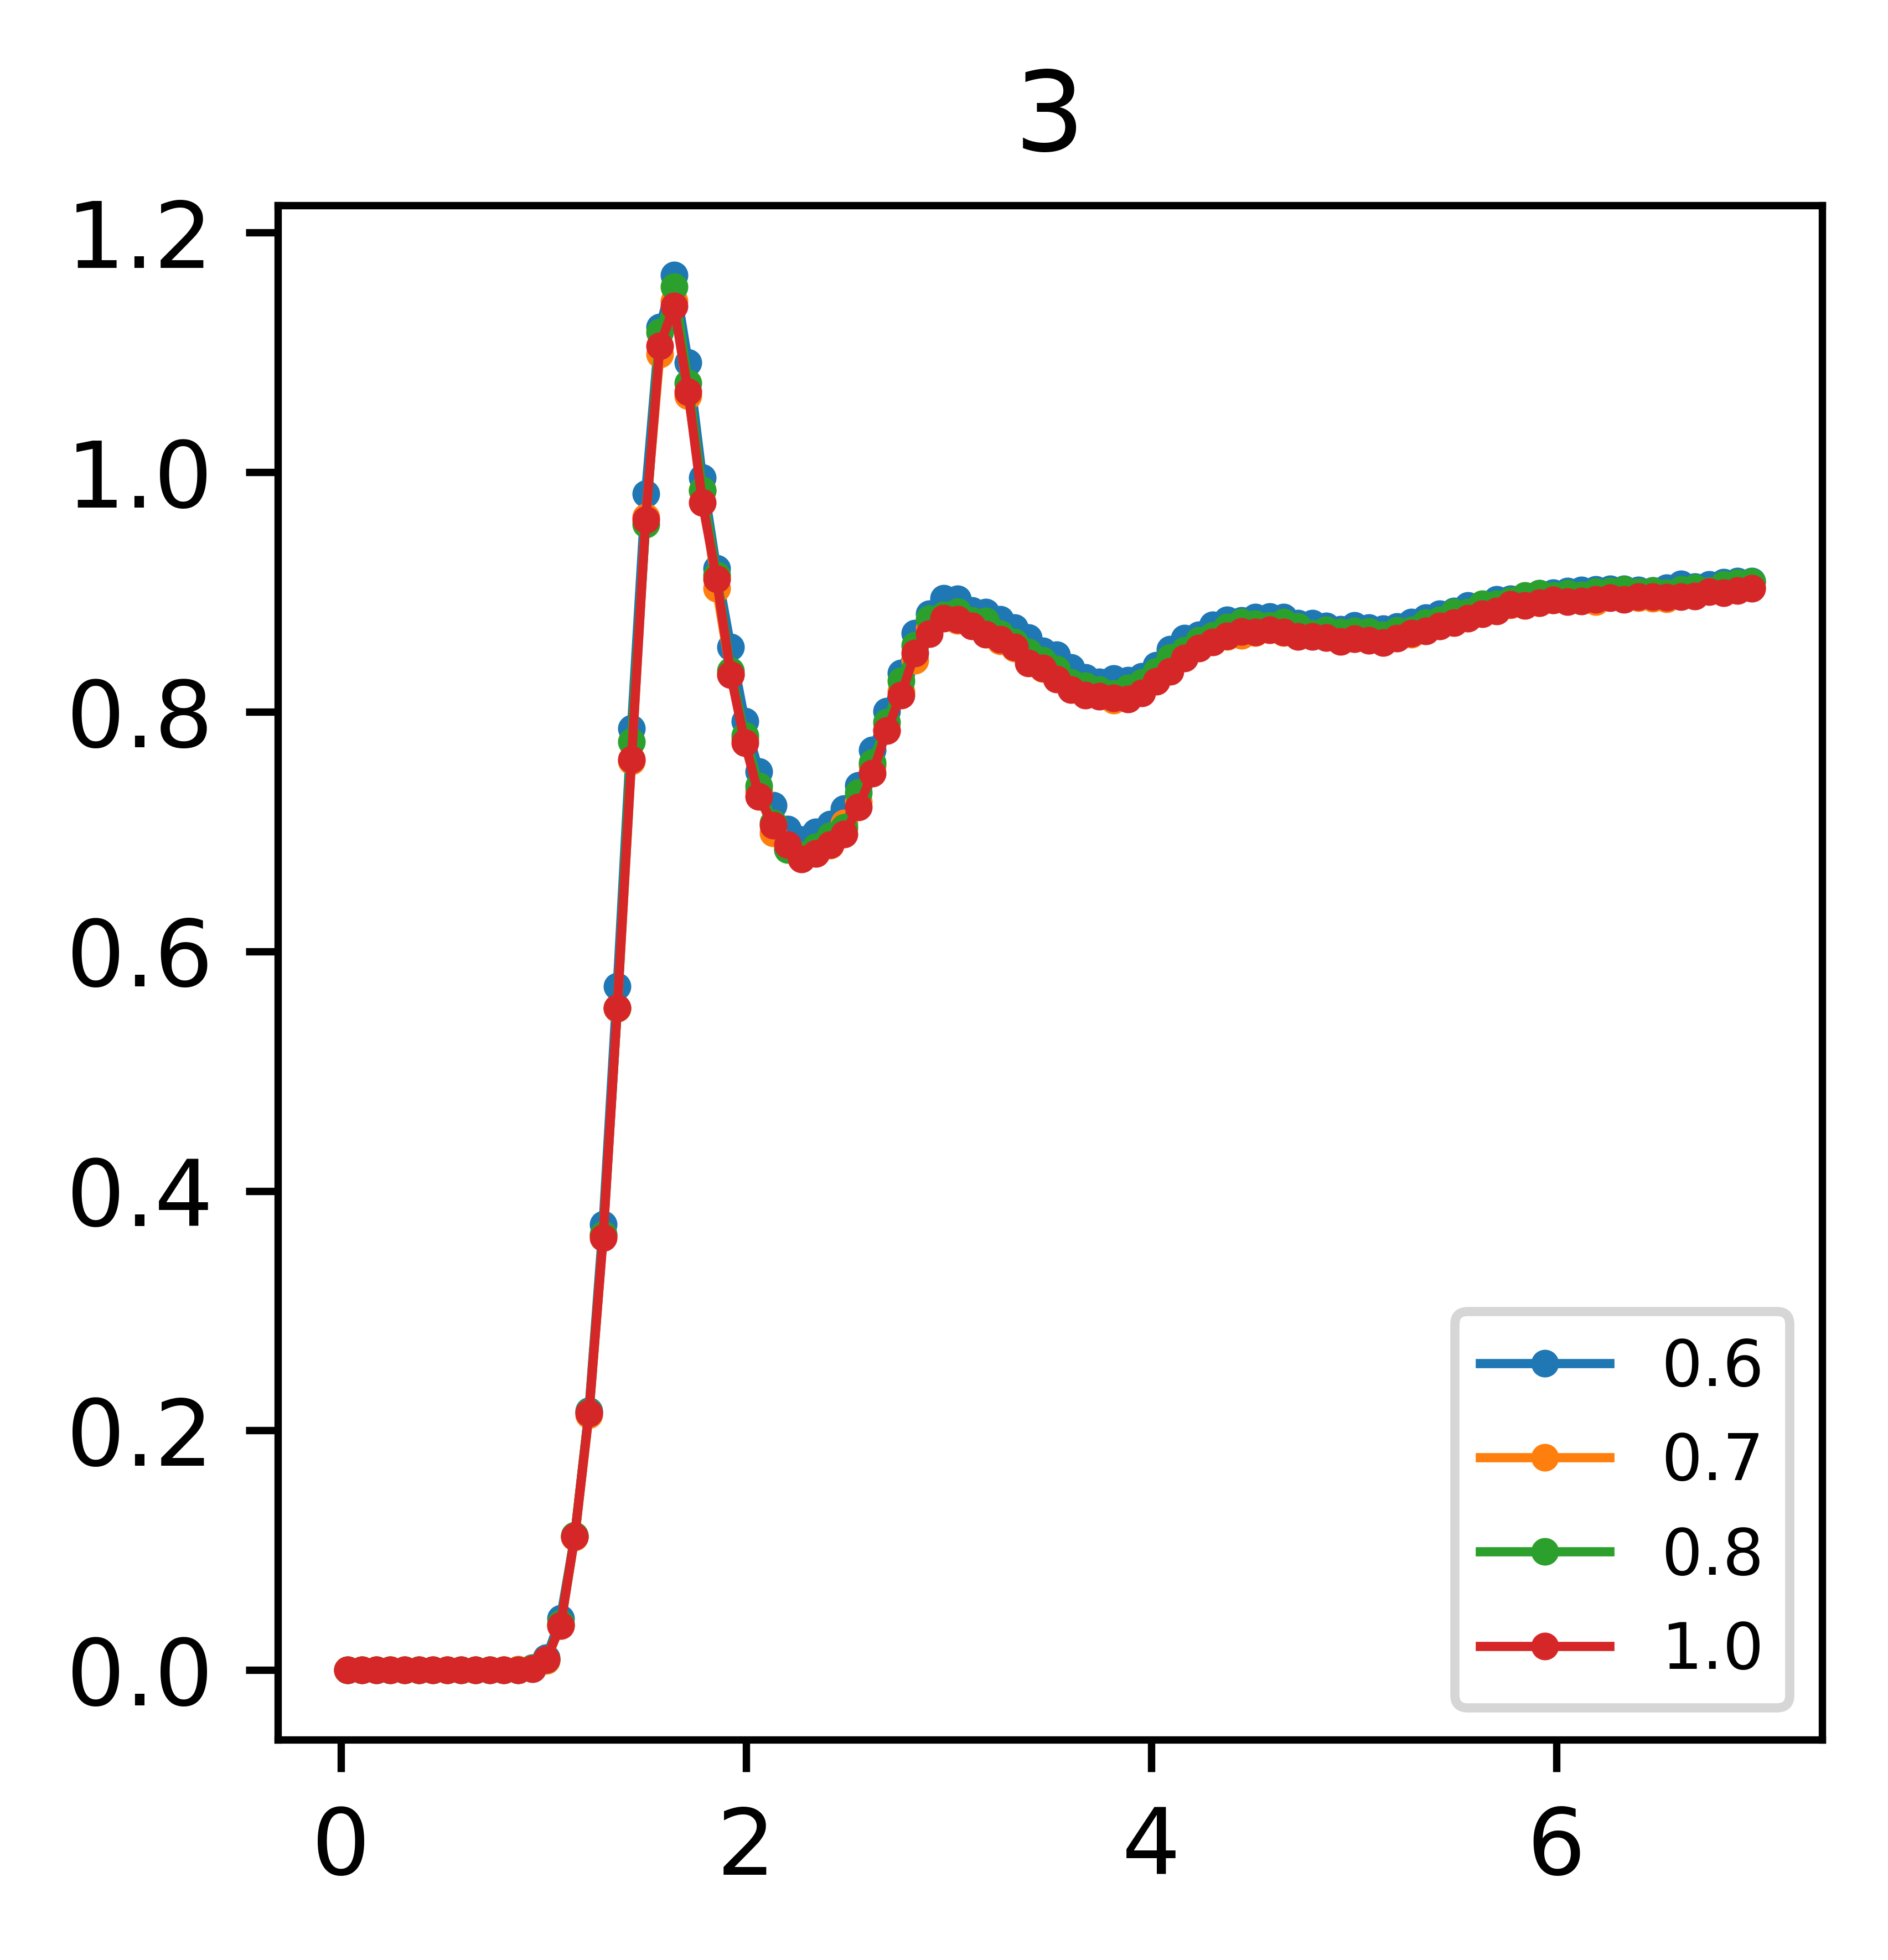

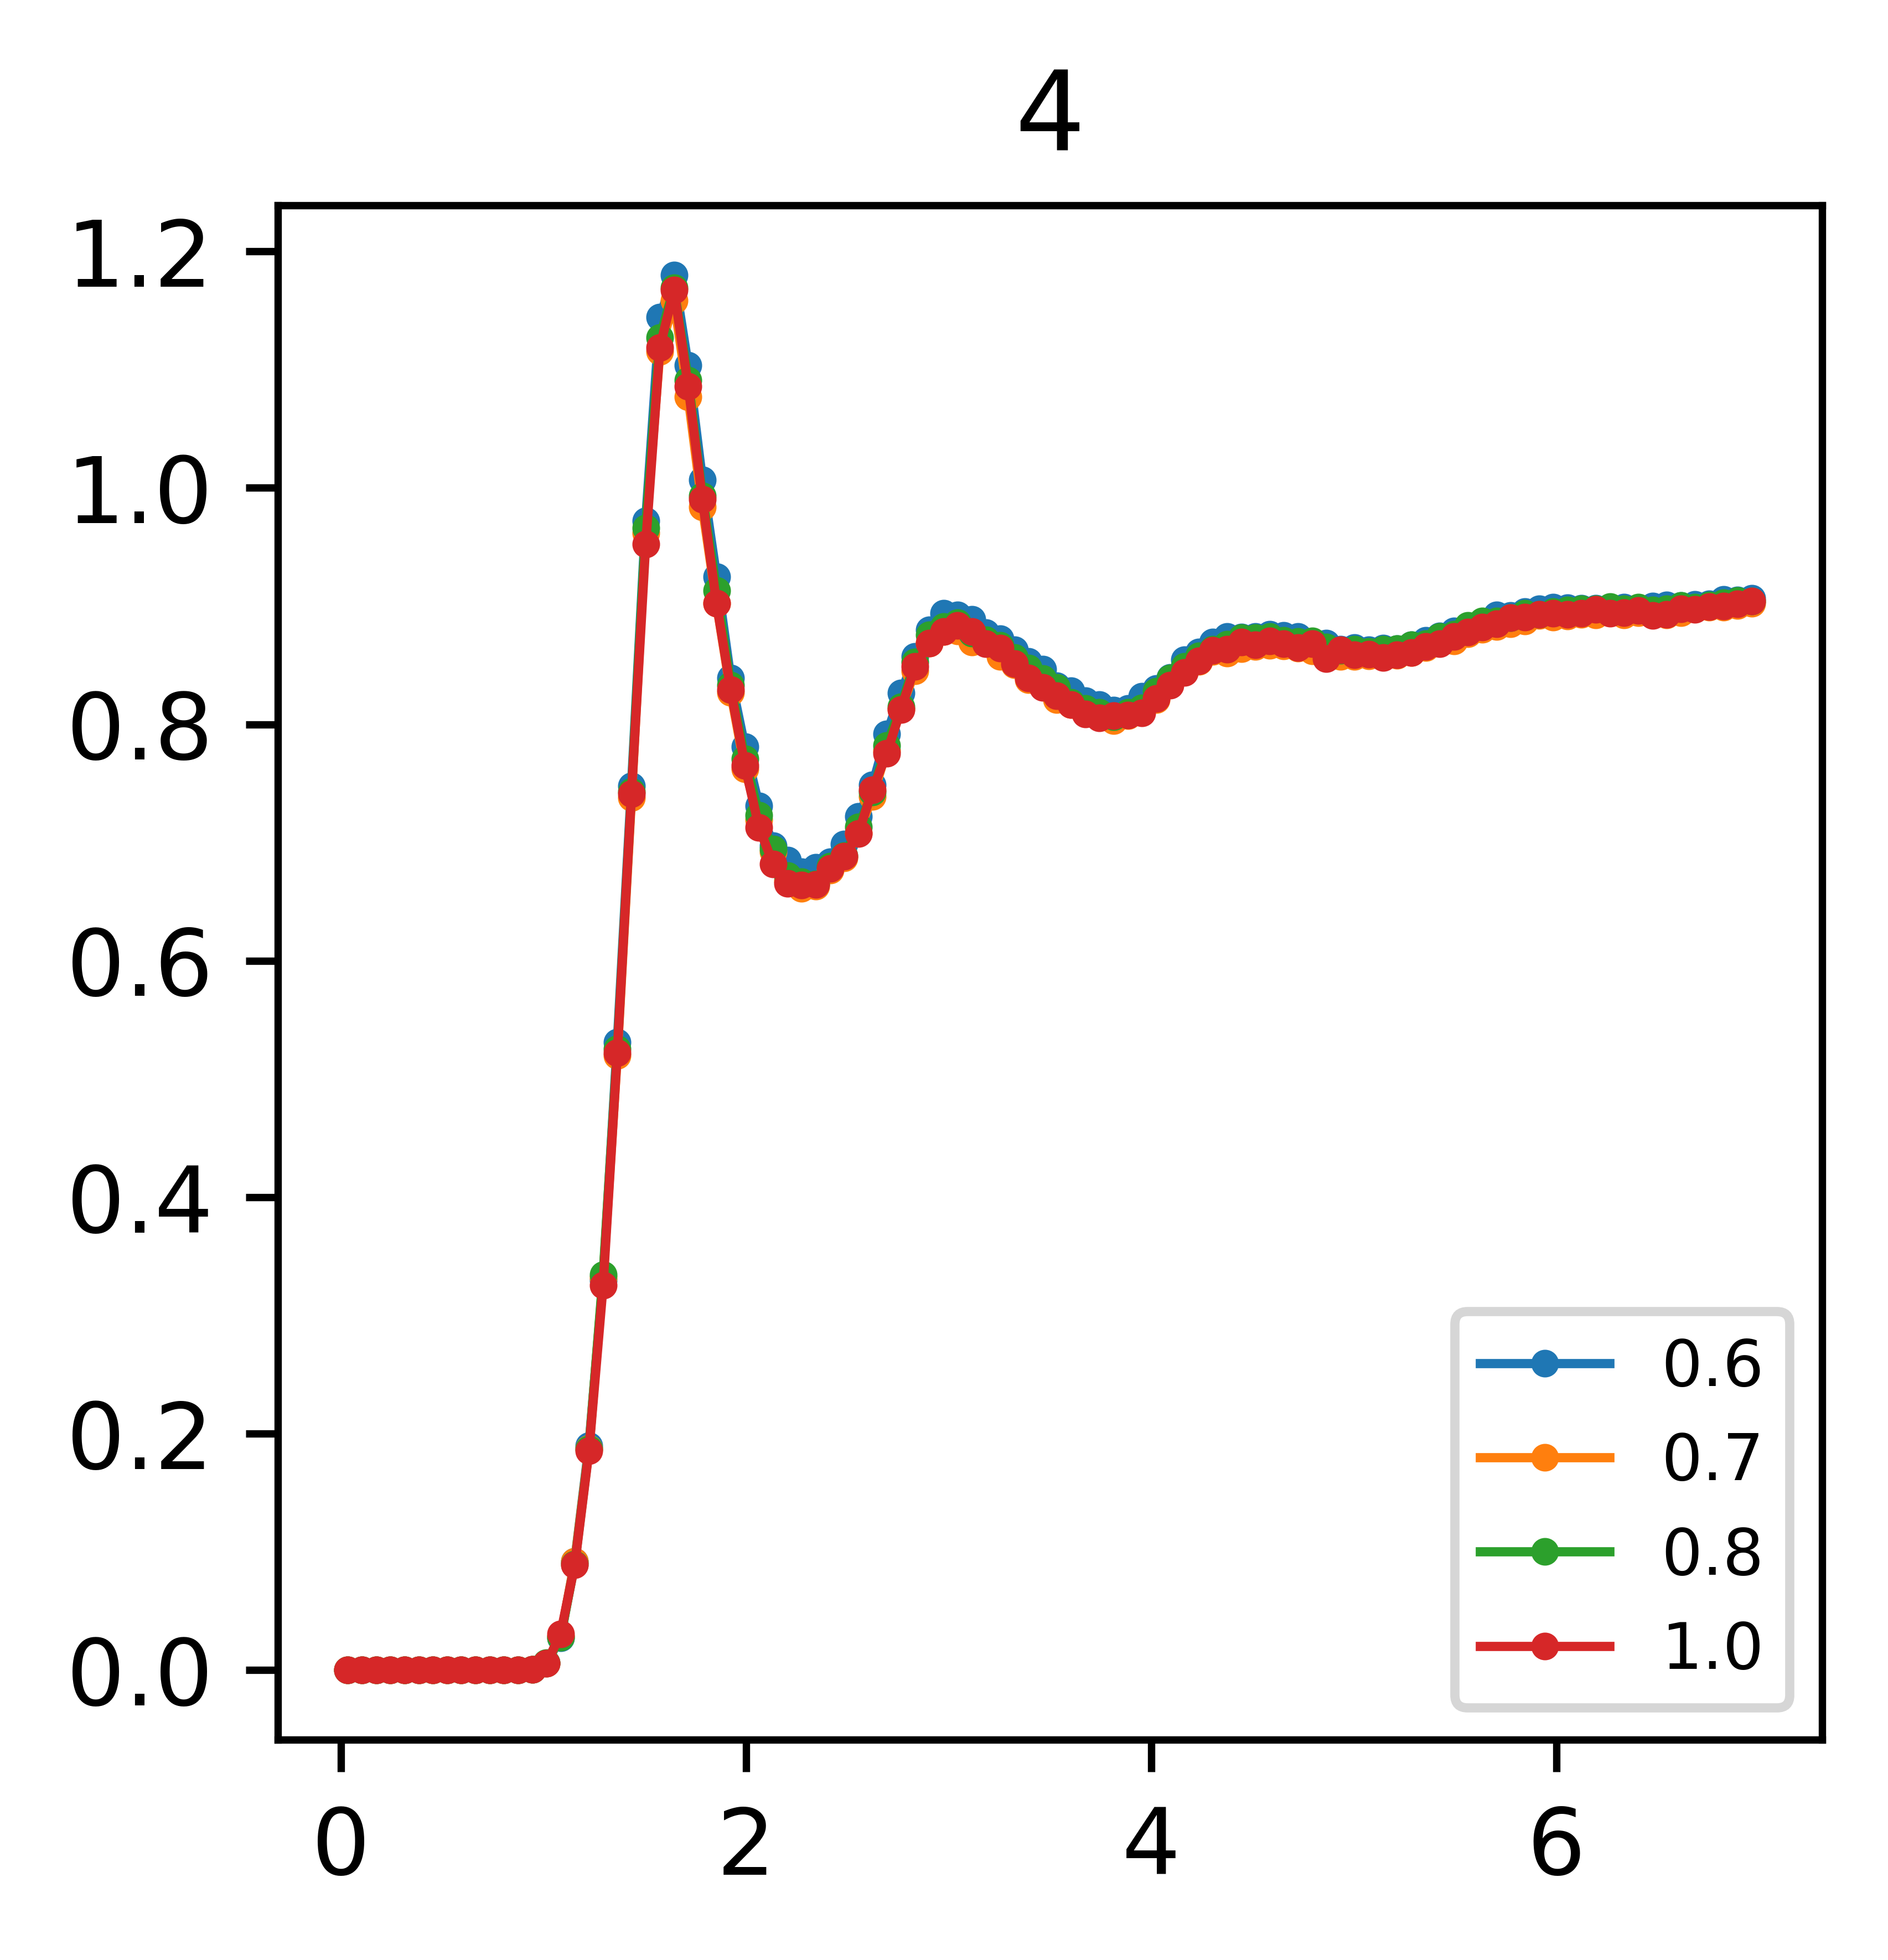

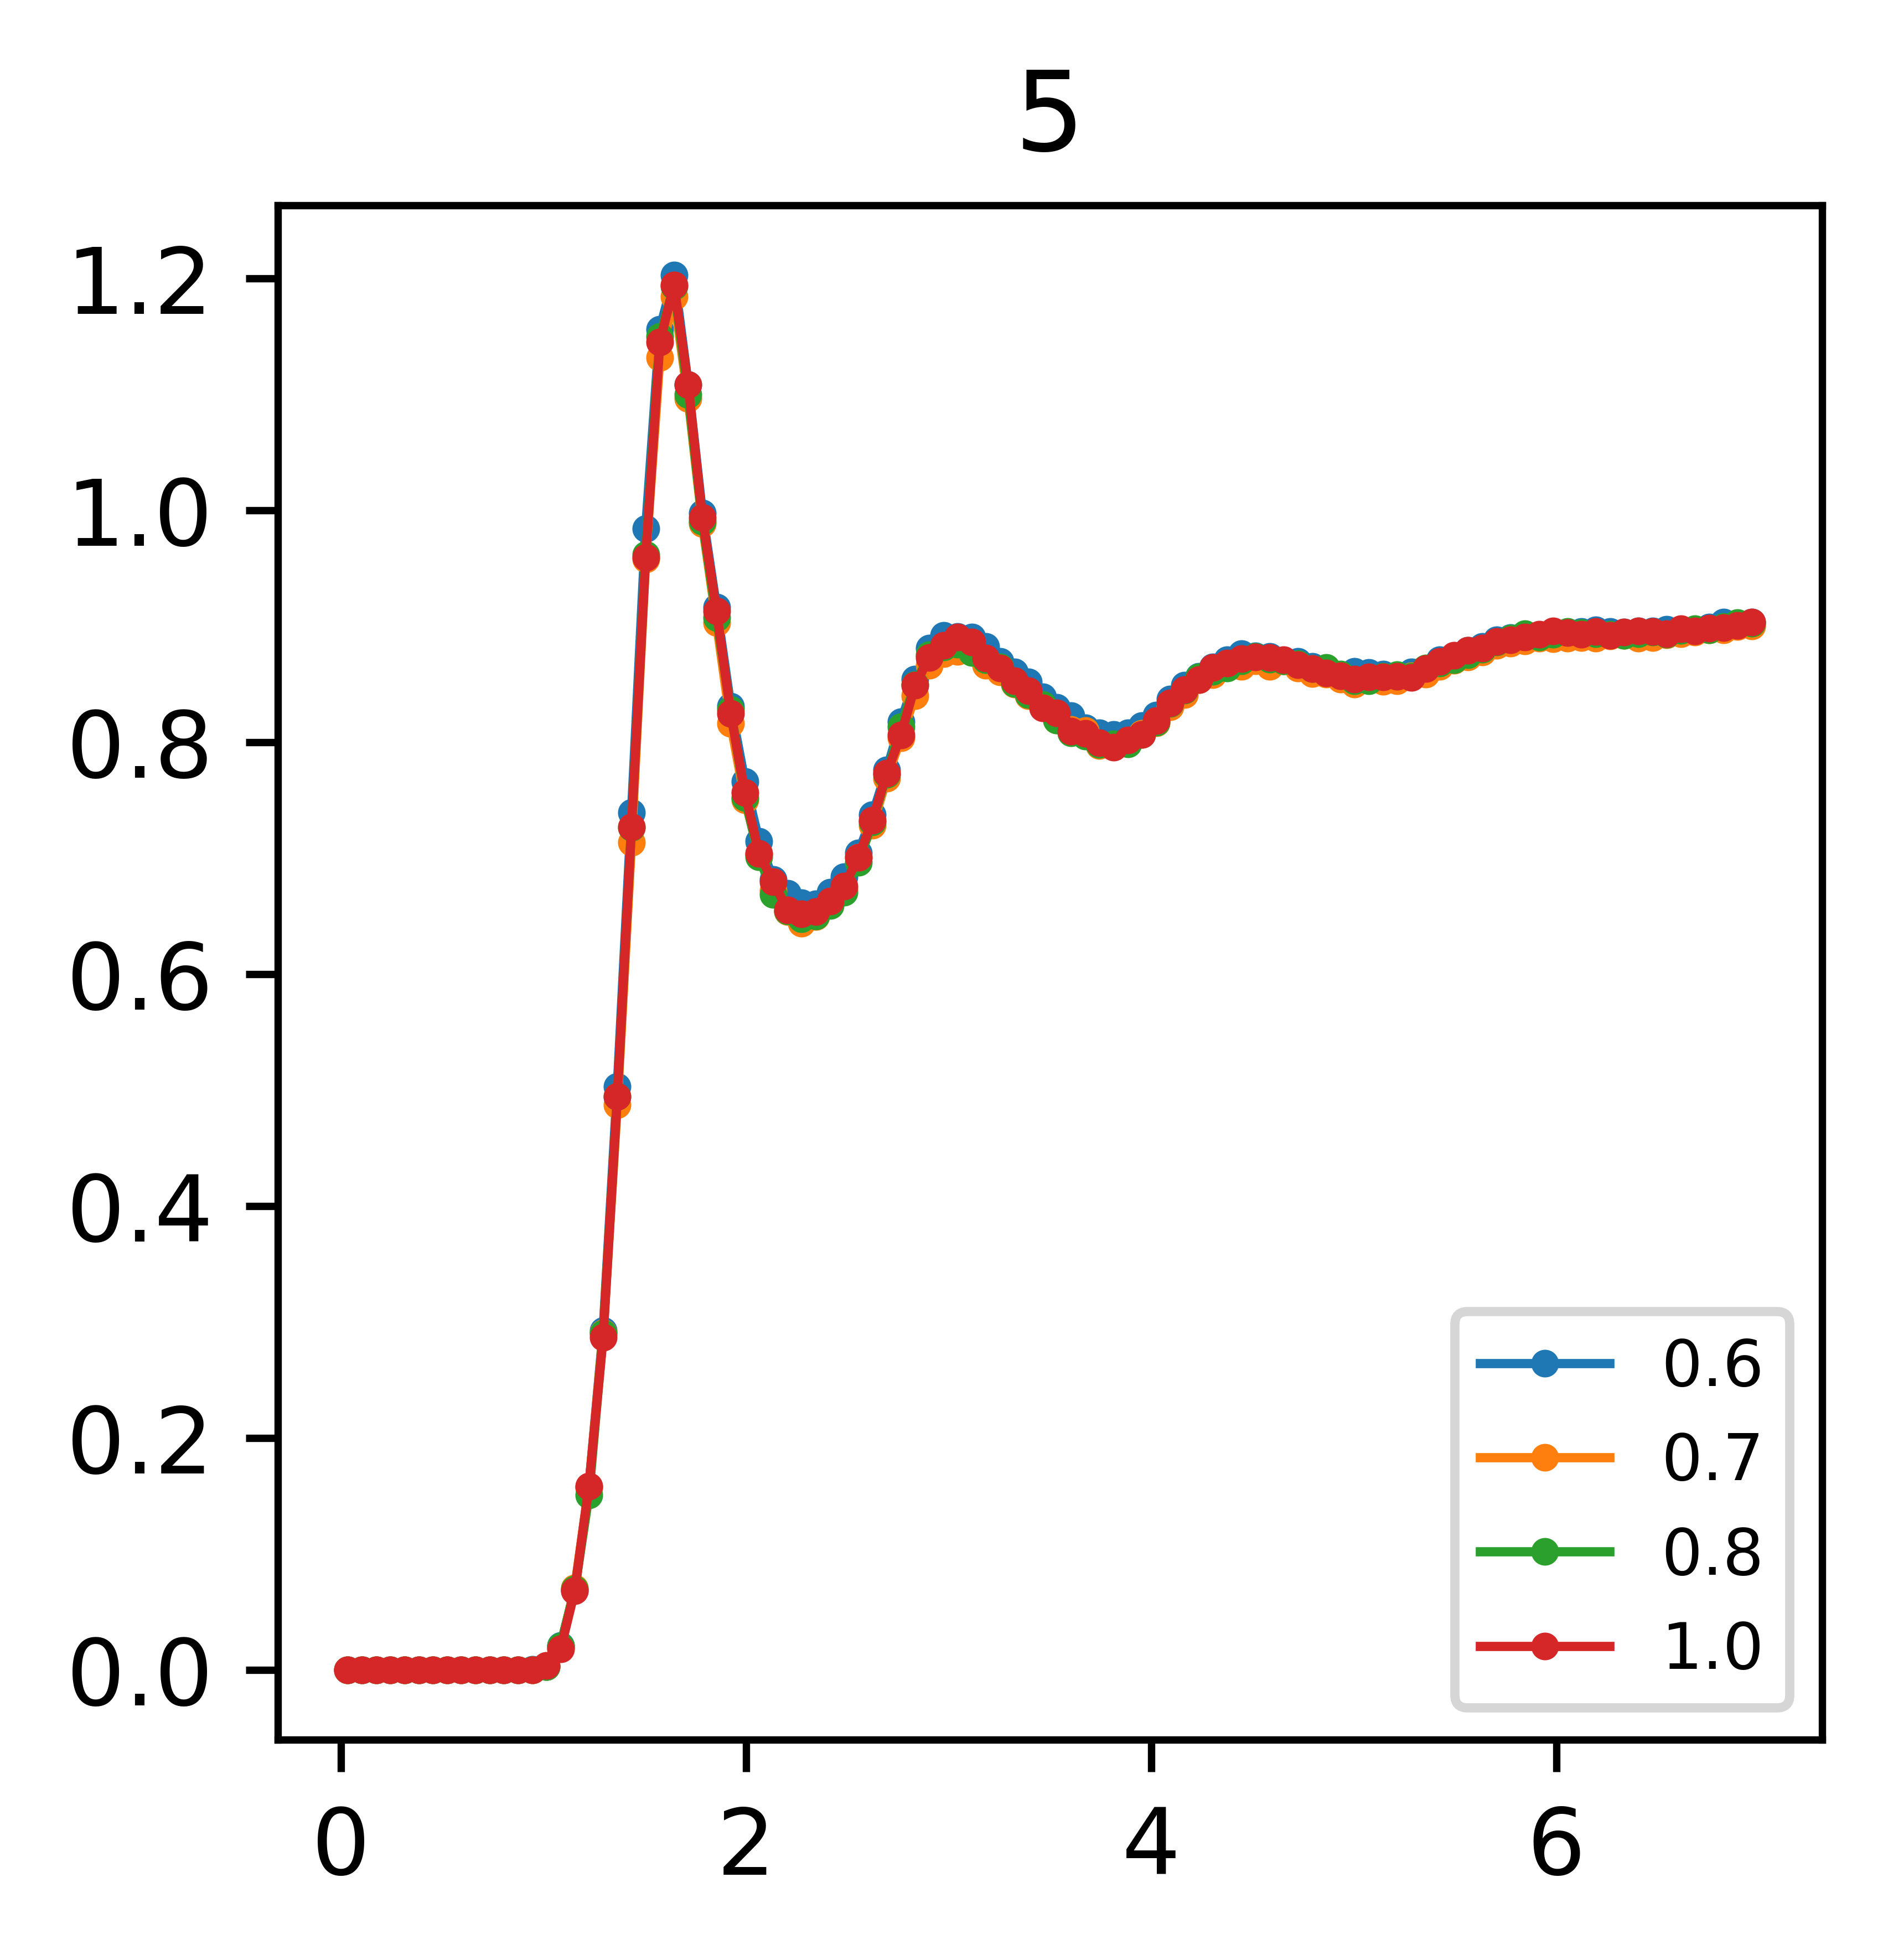

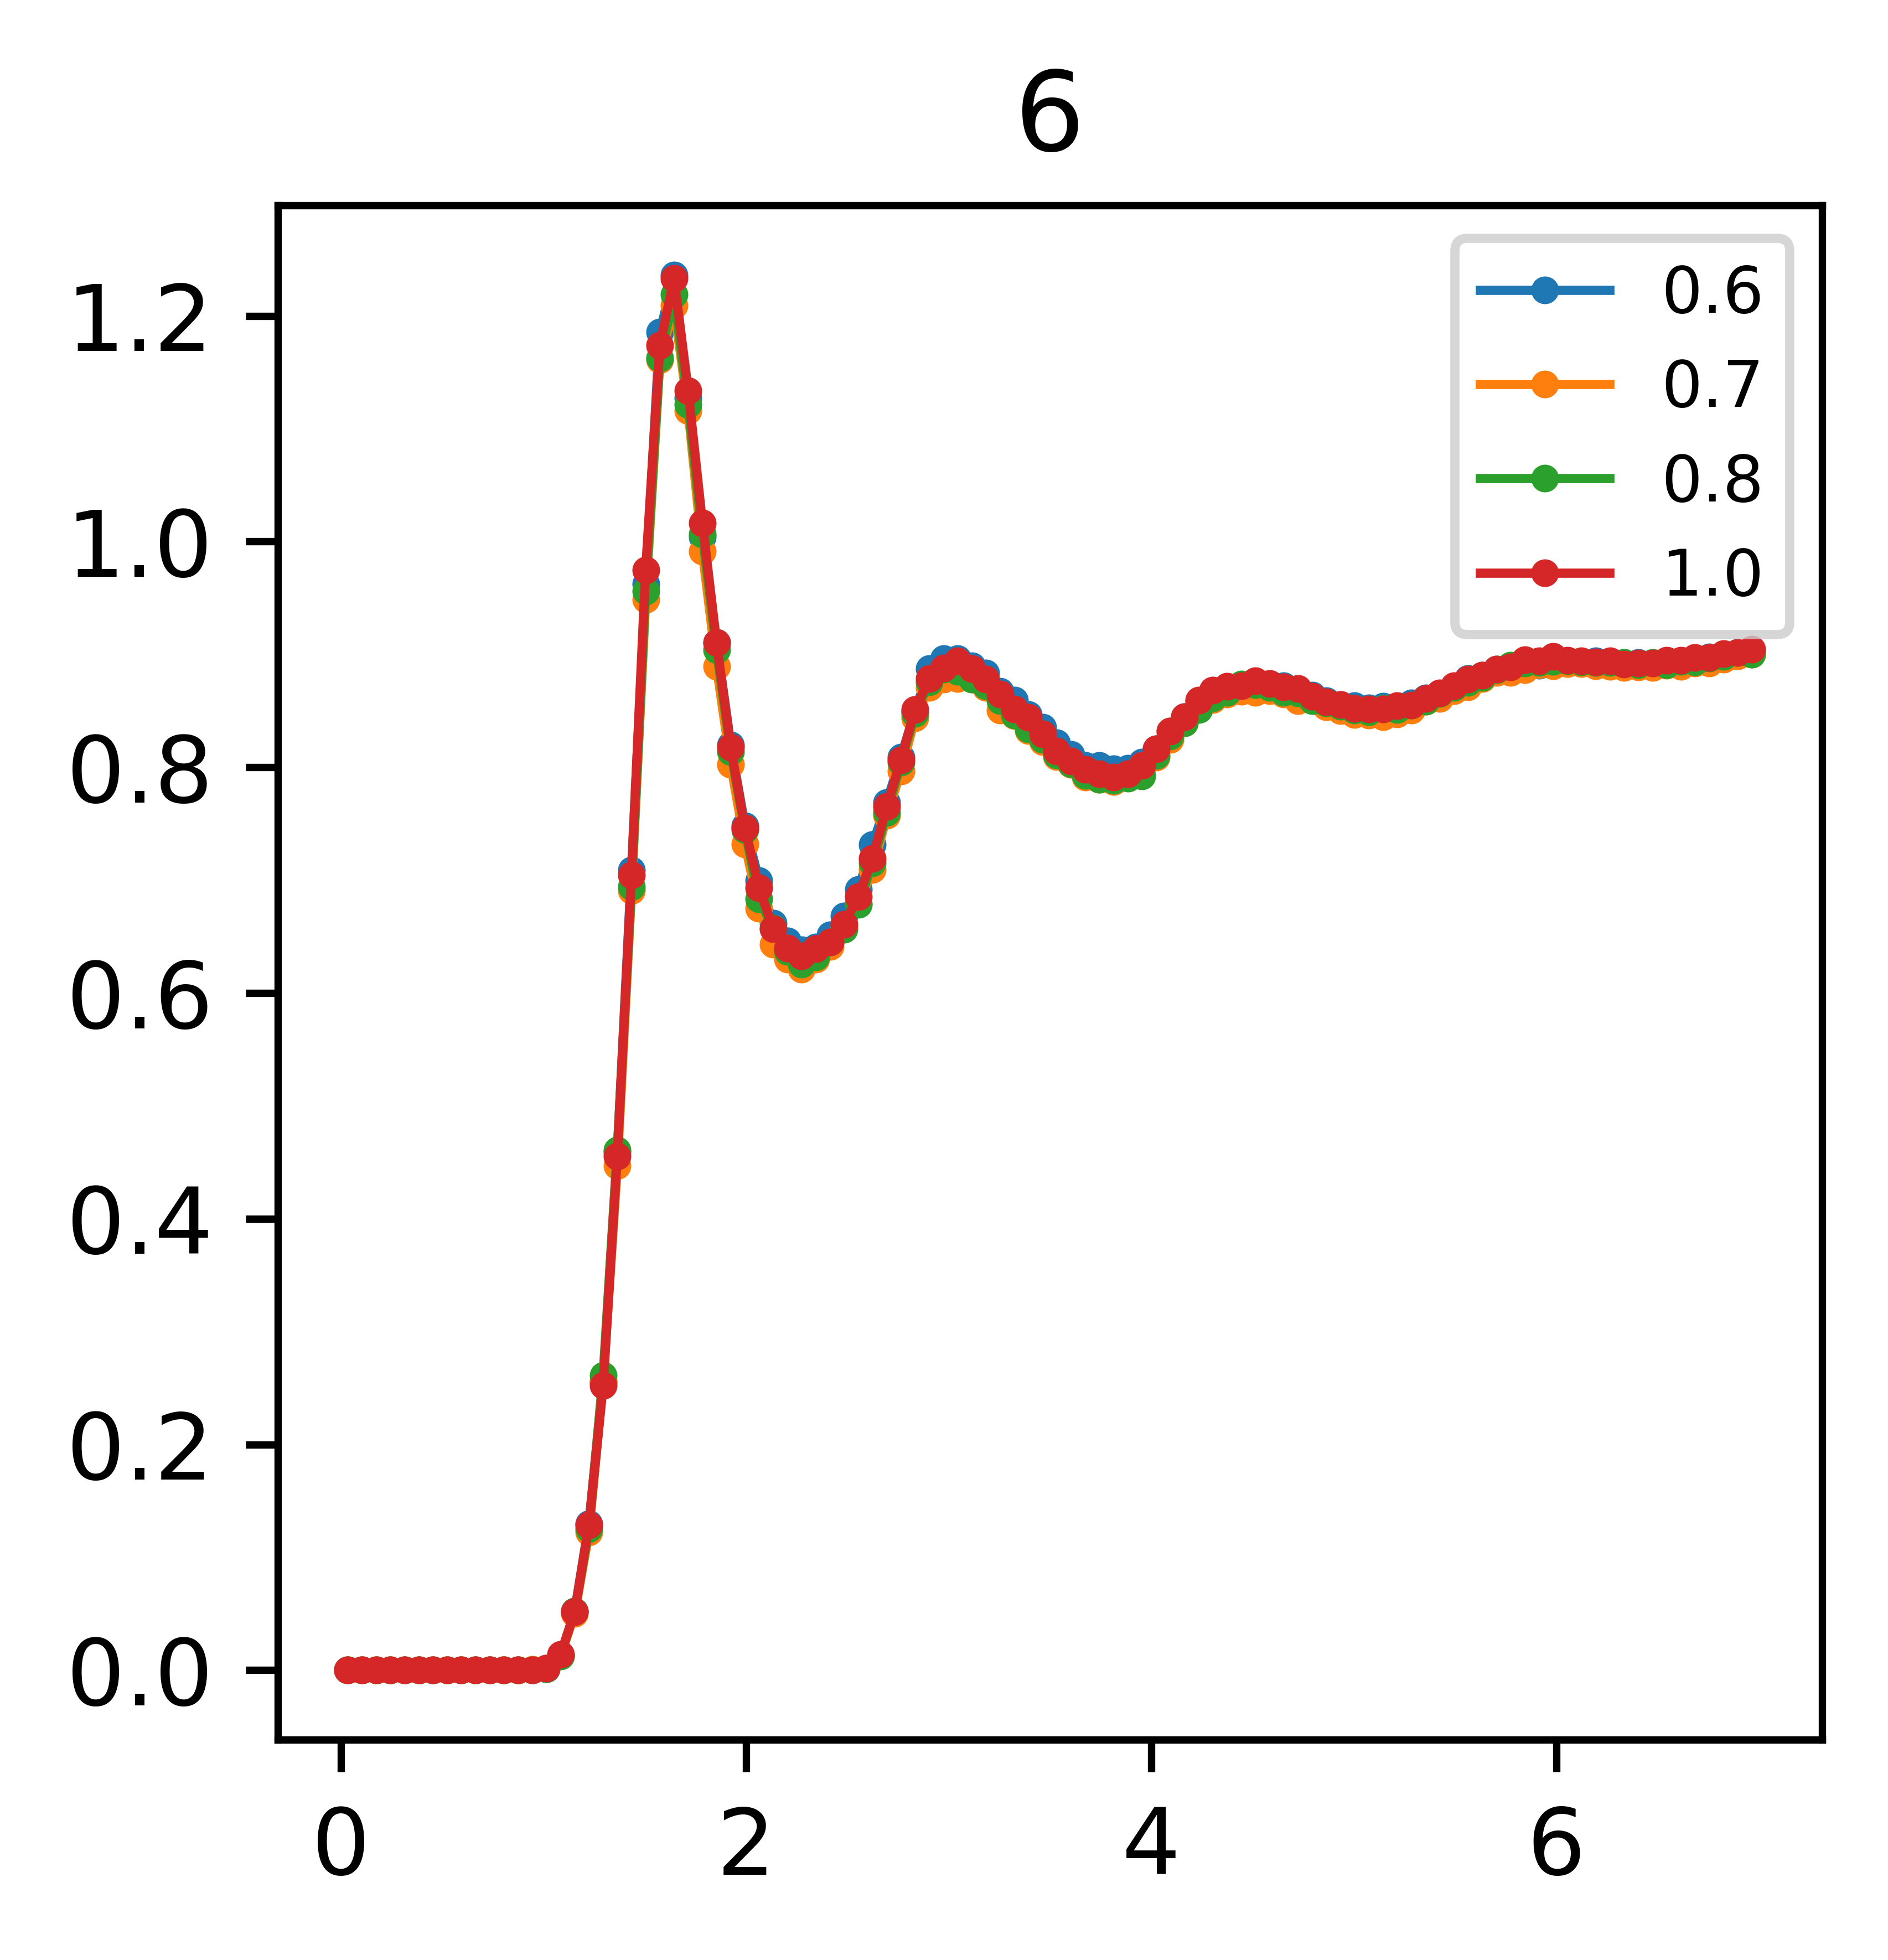

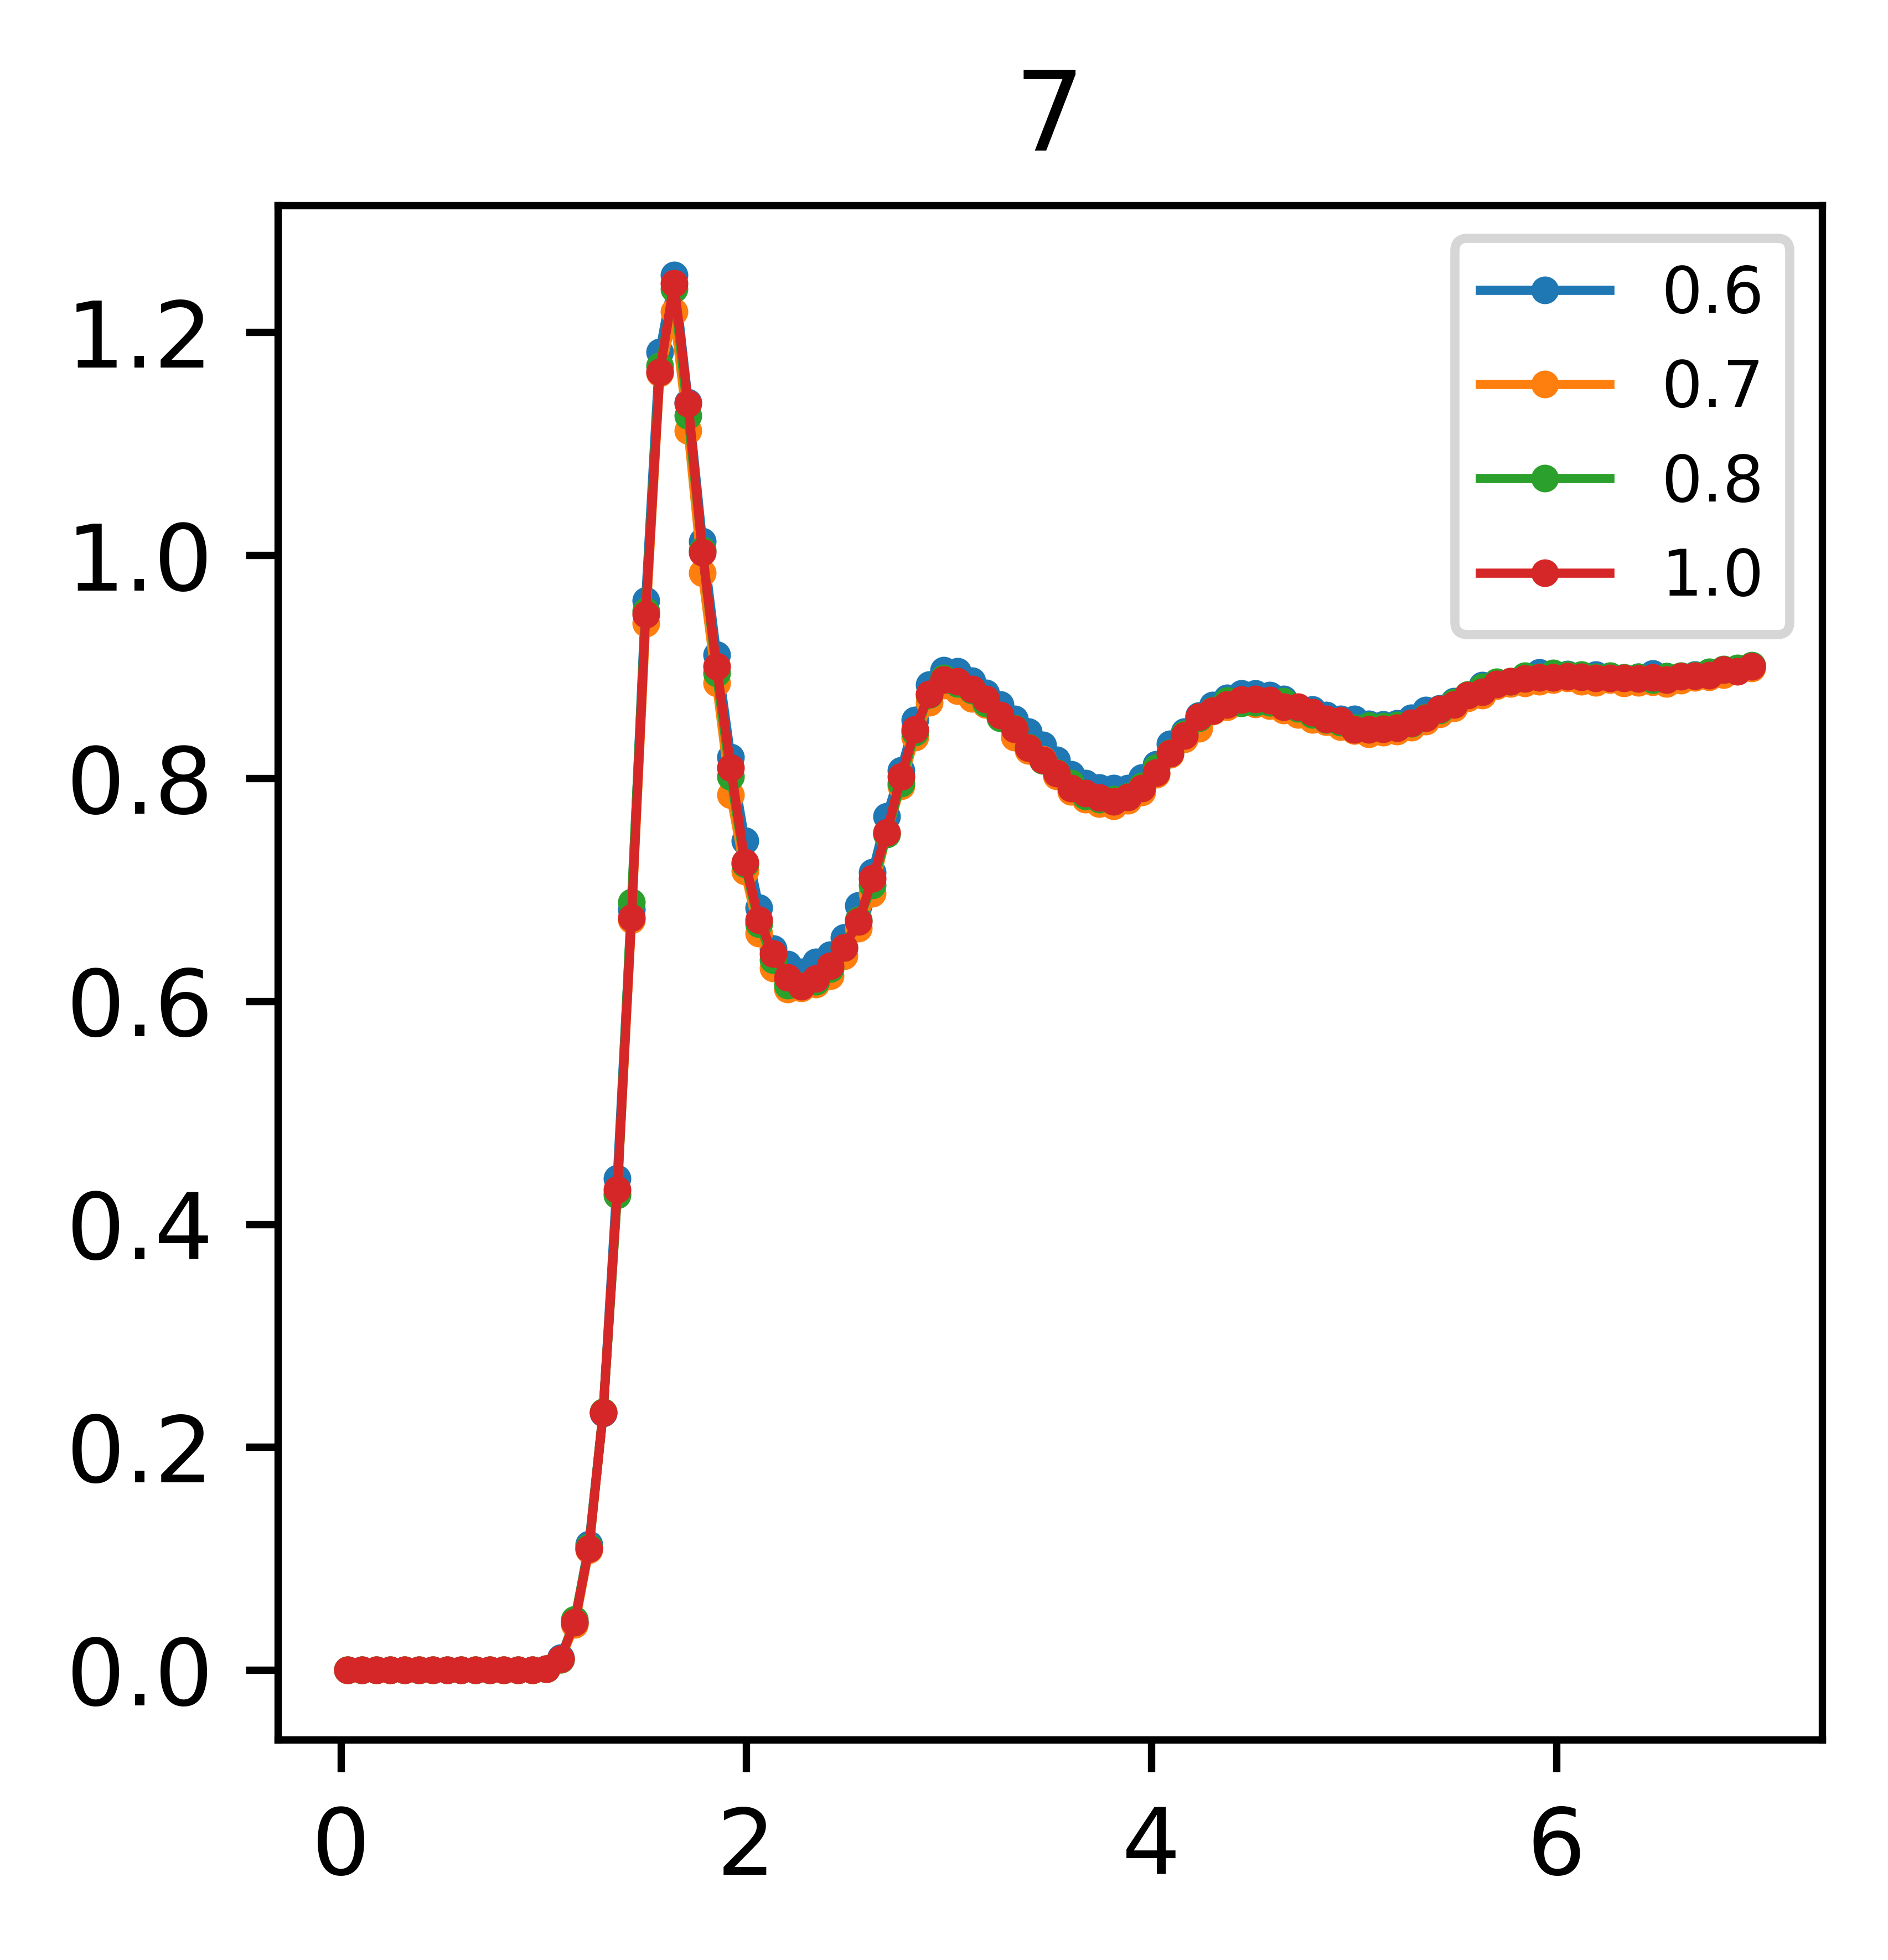

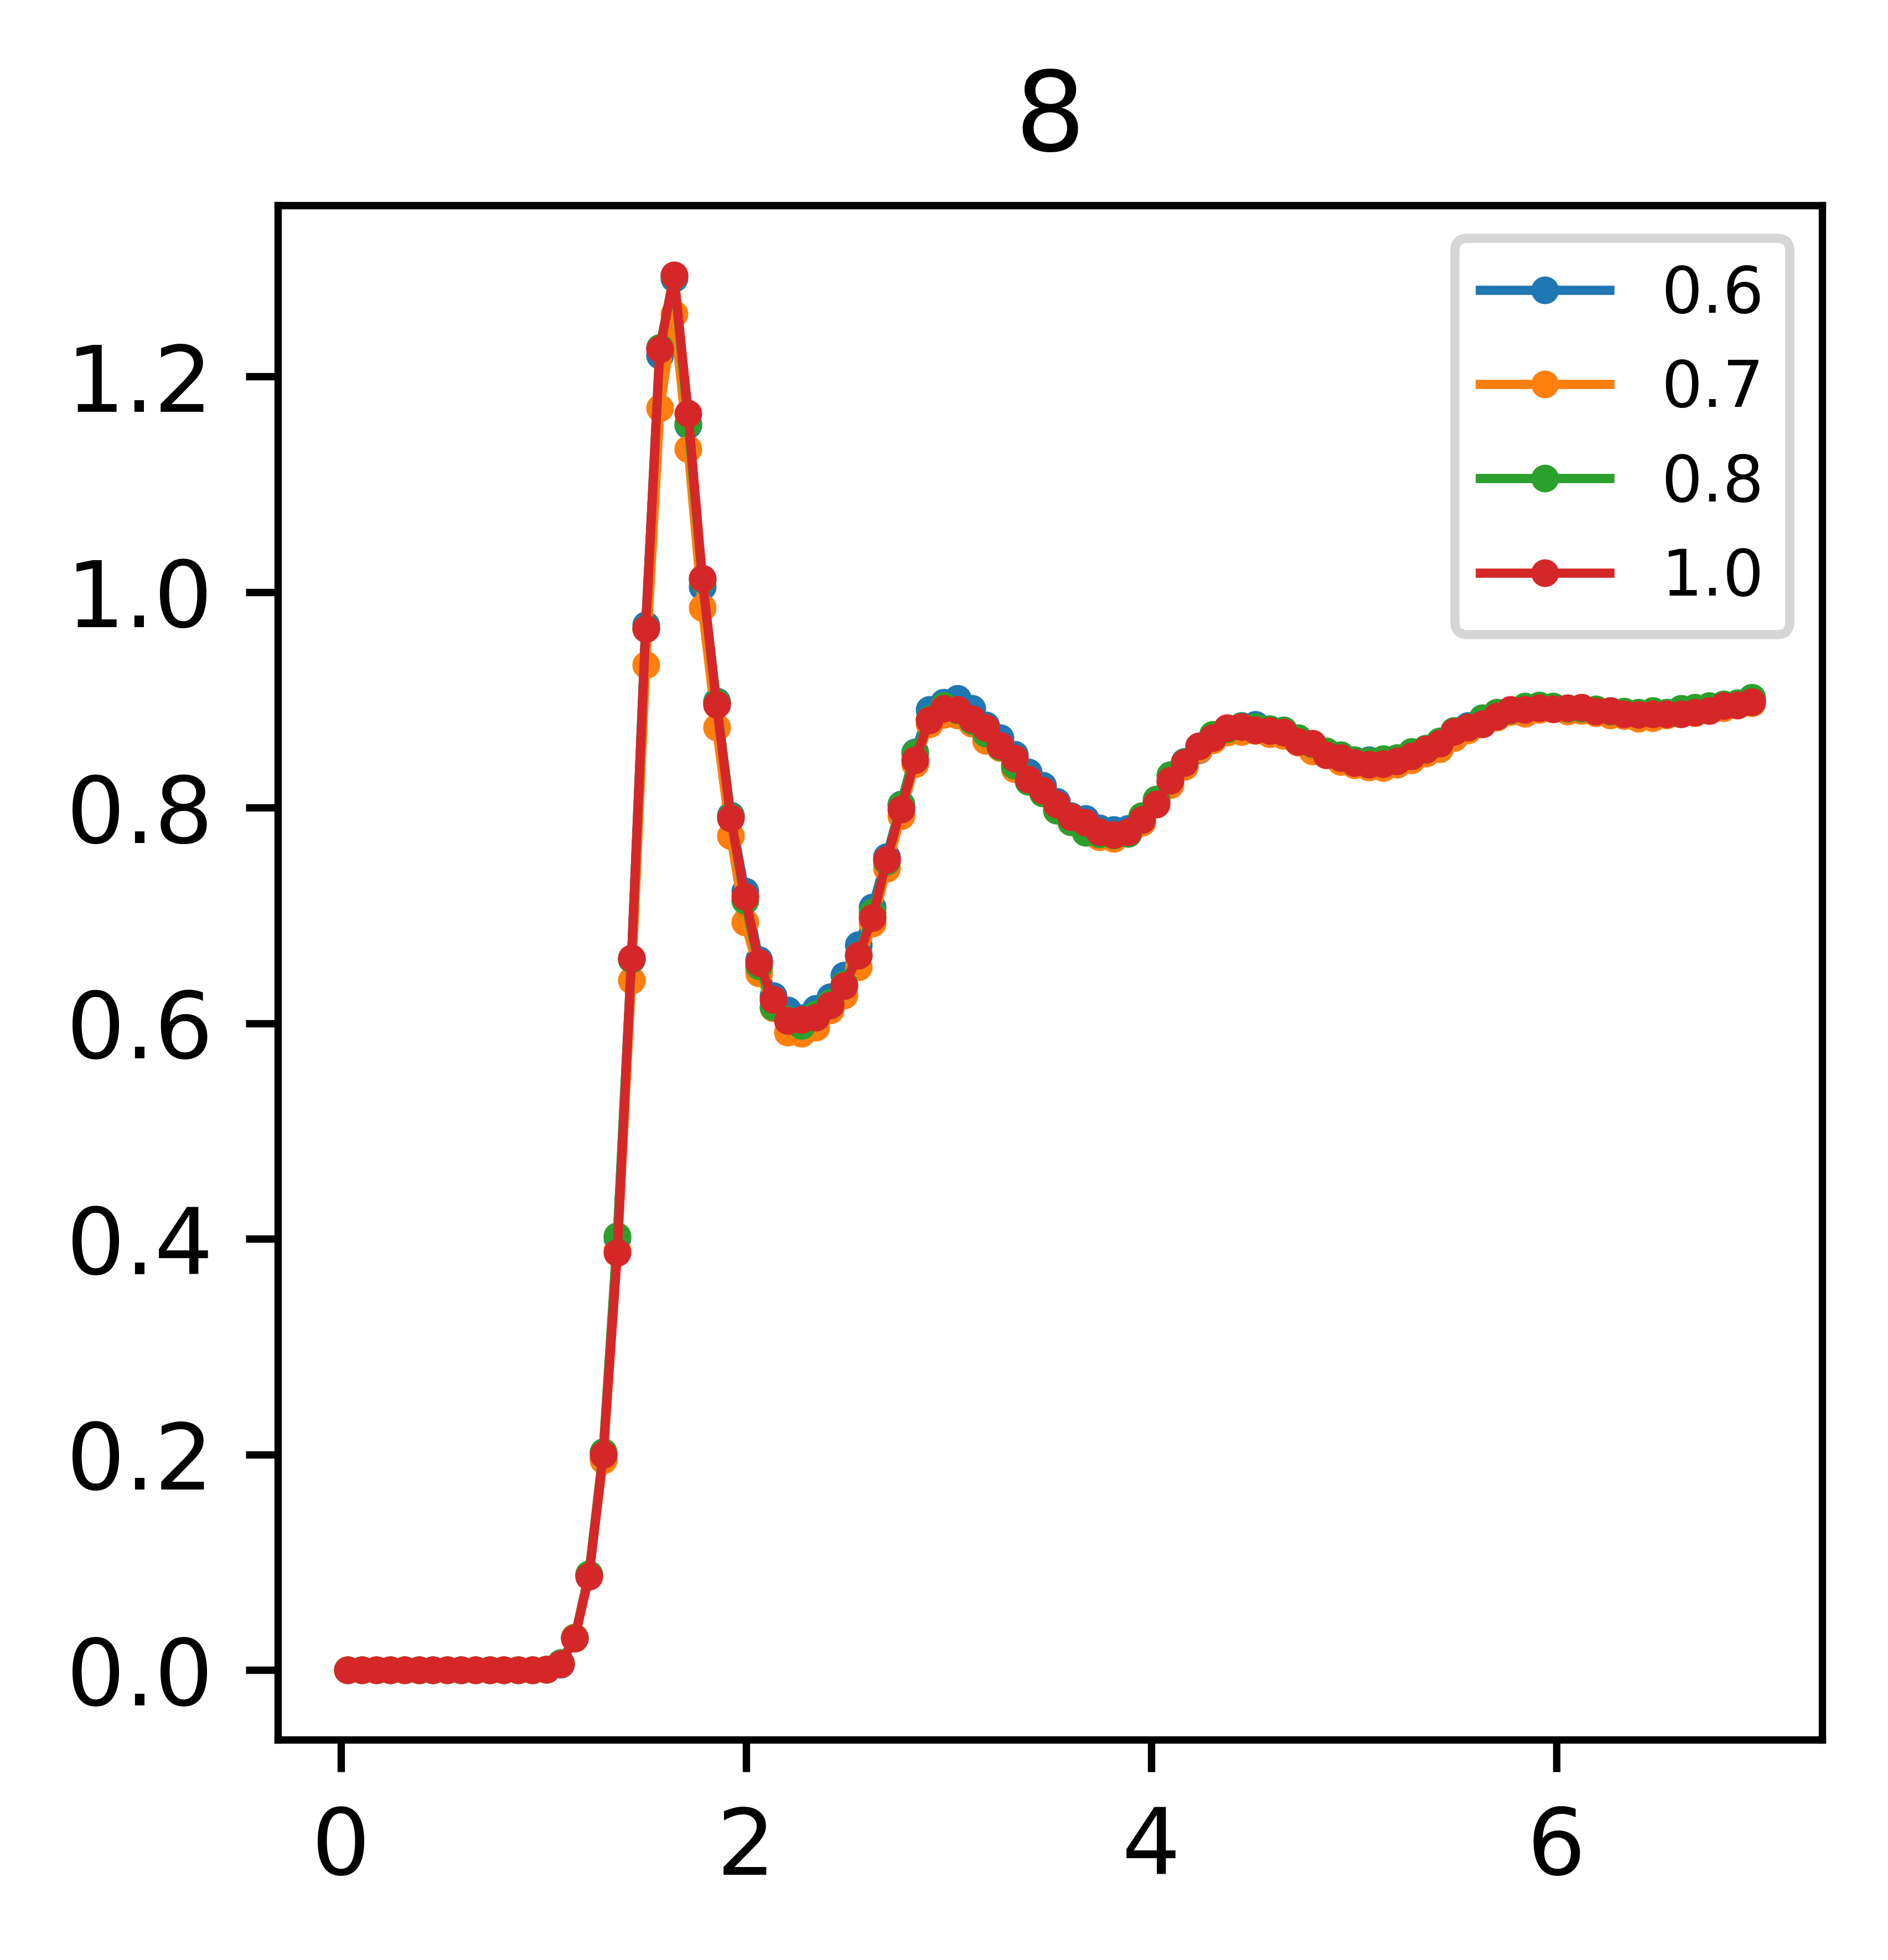

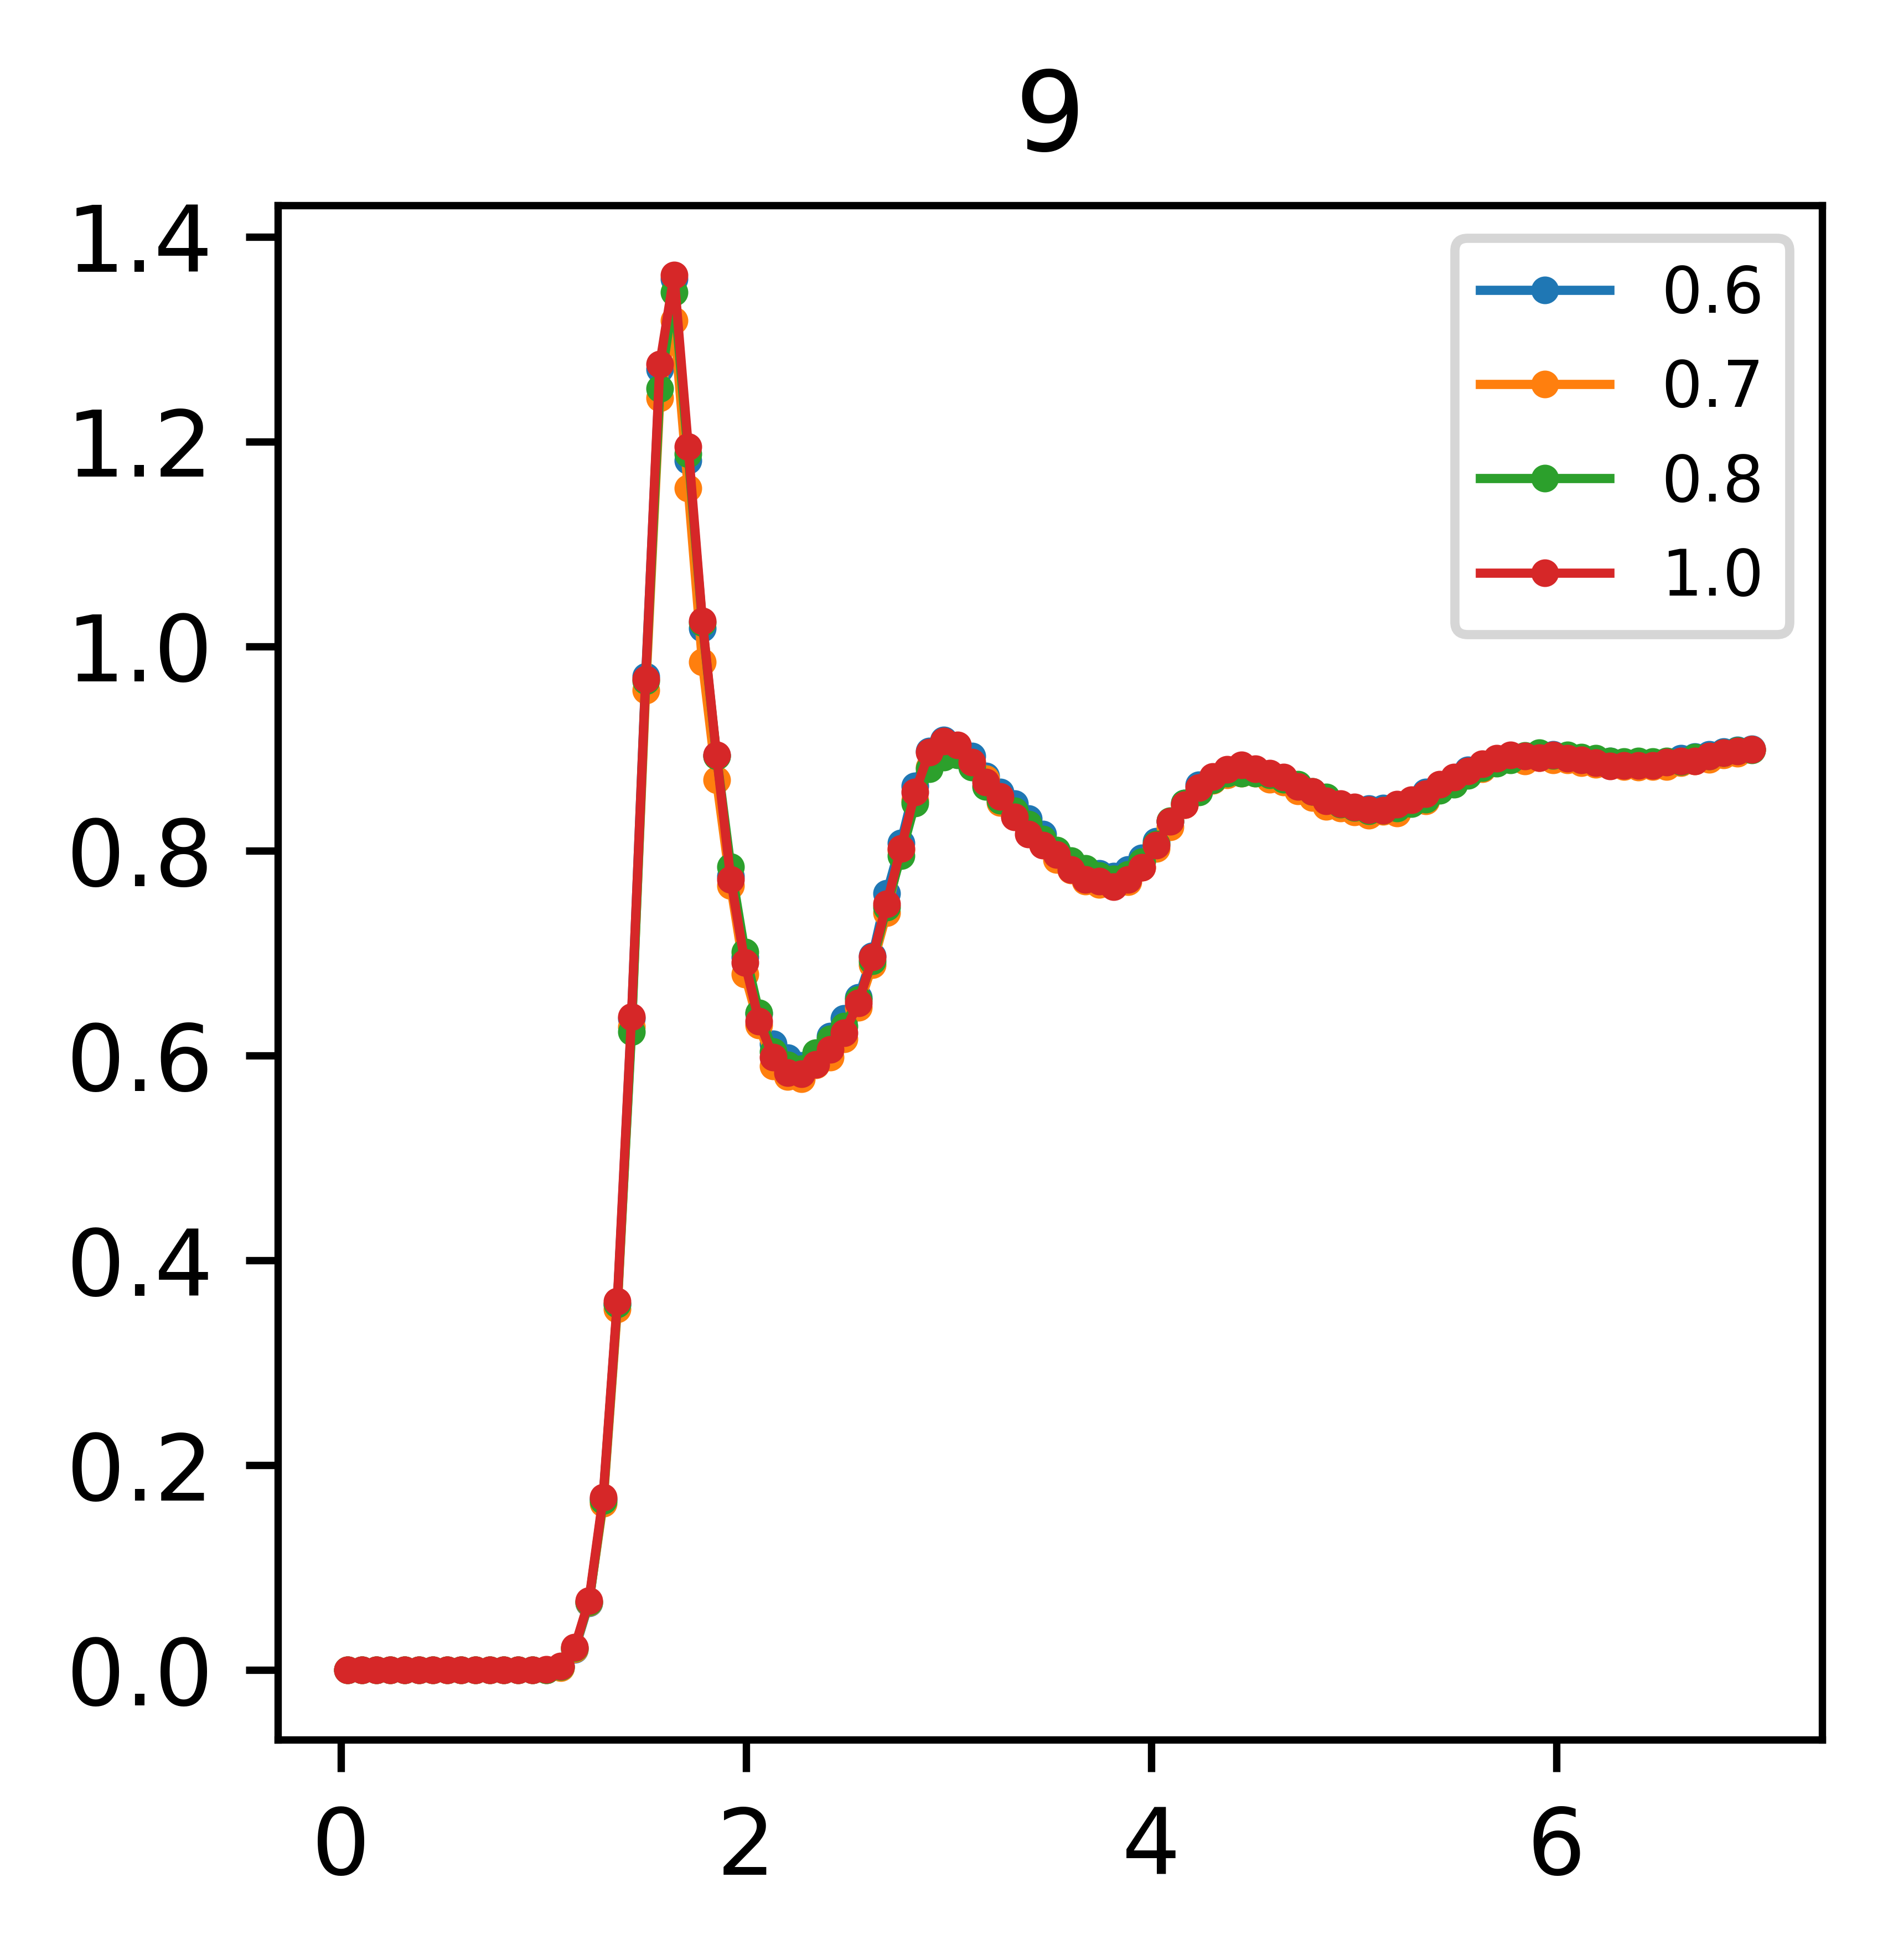

In [87]:
for i, window in enumerate(gsd_windows):
    start = window - 50
    stop = window - 1
    
    fig = plt.figure()

    for ti_ratio, jobs in project.find_jobs({"kT_anneal": [4.0, 1.5]}).groupby("ekk_weight"):
        for job in jobs:
            rdf, N = gsd_rdf(
                gsdfile=job.fn("sim_traj.gsd"),
                start=start,
                stop=stop,
                A_name="E",
                B_name="K",
                exclude_bonded=True,
                r_max=7
            )

            plt.plot(rdf.bin_centers, rdf.rdf * N, label=ti_ratio)
            
    plt.legend()
    plt.title(i)
    plt.show()

In [83]:
dtemp = (job.sp.kT_anneal[0] - job.sp.kT_anneal[1]) / 10
temp = np.arange(job.sp.kT_anneal[1], job.sp.kT_anneal[0], dtemp)

In [84]:
temp

array([1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75])

In [80]:
(job.sp.kT_anneal[0] - job.sp.kT_anneal[1]) / 10

0.25